In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [233]:
na_values_to_mark_as_na = ["Not Applicable","Not Available"]
survey = pd.read_csv("./Data/Patient_survey__HCAHPS__-_Hospital.csv", 
                     na_values={"Patient Survey Star Rating":na_values_to_mark_as_na,
                                "HCAHPS Answer Percent": na_values_to_mark_as_na,
                                "HCAHPS Linear Mean Value":na_values_to_mark_as_na,
                               "Number of Completed Surveys":na_values_to_mark_as_na,
                               "Survey Response Rate Percent":na_values_to_mark_as_na

                               })

complications = pd.read_csv('./Data/Complications_and_Deaths_-_Hospital.csv',
                           na_values={"Score":na_values_to_mark_as_na})


Question I have
1. Not Avaialbe vs Not Aplicable

In [234]:
complications.shape

(92155, 19)

In [235]:
survey.shape

(245450, 23)

In [236]:
complications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92155 entries, 0 to 92154
Data columns (total 19 columns):
Provider ID             92155 non-null object
Hospital Name           92155 non-null object
Address                 92155 non-null object
City                    92155 non-null object
State                   92155 non-null object
ZIP Code                92155 non-null int64
County Name             91934 non-null object
Phone Number            92155 non-null int64
Measure Name            92155 non-null object
Measure ID              92155 non-null object
Compared to National    92155 non-null object
Denominator             92155 non-null object
Score                   54368 non-null float64
Lower Estimate          92155 non-null object
Higher Estimate         92155 non-null object
Footnote                37846 non-null object
Measure Start Date      92155 non-null object
Measure End Date        92155 non-null object
Location                92155 non-null object
dtypes: float64(1)

In [237]:
# This shows counts without NaN
survey.count()

Provider ID                              245450
Hospital Name                            245450
Address                                  245450
City                                     245450
State                                    245450
ZIP Code                                 245450
County Name                              244800
Phone Number                             245450
HCAHPS Measure ID                        245450
HCAHPS Question                          245450
HCAHPS Answer Description                245450
Patient Survey Star Rating                38819
Patient Survey Star Rating Footnote       15180
HCAHPS Answer Percent                    122612
HCAHPS Answer Percent Footnote            44341
HCAHPS Linear Mean Value                  35290
Number of Completed Surveys              211400
Number of Completed Surveys Footnote      76450
Survey Response Rate Percent             211400
Survey Response Rate Percent Footnote     76450
Measure Start Date                      

In [238]:
# getting column names and thier indexes
for ind,val in enumerate(survey.columns):
    print(ind,":", val)

0 : Provider ID
1 : Hospital Name
2 : Address
3 : City
4 : State
5 : ZIP Code
6 : County Name
7 : Phone Number
8 : HCAHPS Measure ID
9 : HCAHPS Question
10 : HCAHPS Answer Description
11 : Patient Survey Star Rating
12 : Patient Survey Star Rating Footnote
13 : HCAHPS Answer Percent
14 : HCAHPS Answer Percent Footnote
15 : HCAHPS Linear Mean Value
16 : Number of Completed Surveys
17 : Number of Completed Surveys Footnote
18 : Survey Response Rate Percent
19 : Survey Response Rate Percent Footnote
20 : Measure Start Date
21 : Measure End Date
22 : Location


In [239]:
data_set = pd.DataFrame([survey.shape, complications.shape], columns=['Total Records', 'Columns'], index=['Survey','Complication'])
data_set.T
data_set3 = data_set.reset_index().rename(columns={"index":"Type"})
data_set3

,Type,Total Records,Columns
0,Survey,245450,23
1,Complication,92155,19


In [240]:
data_set3.dtypes

Type             object
Total Records     int64
Columns           int64
dtype: object

In [241]:
data_set3.iloc[:,[0,1,2]]

,Type,Total Records,Columns
0,Survey,245450,23
1,Complication,92155,19


In [242]:
data_set_2= data_set.T.reset_index().rename(columns={"index":"Type"})
data_set_2

,Type,Survey,Complication
0,Total Records,245450,92155
1,Columns,23,19


<class 'matplotlib.axes._subplots.AxesSubplot'>


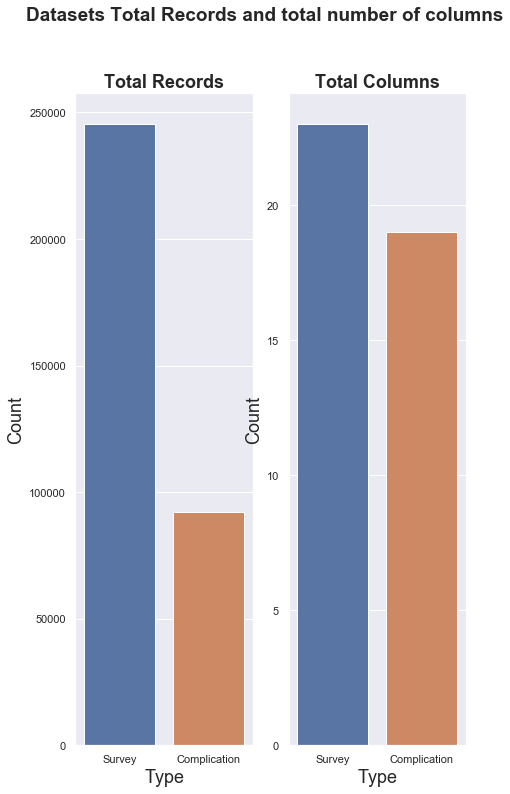

In [280]:

fig, ax = plt.subplots(1,2, figsize=(7,12))

plt.suptitle("Datasets Total Records and total number of columns",fontsize=19, **{"fontweight":"semibold"})
surv_comp = sns.barplot(x="Type", y="Total Records", data=data_set3, ax=ax[0])
col_total = sns.barplot(x="Type", y="Columns", data=data_set3, ax=ax[1])

surv_comp.set_title("Total Records", fontsize=18, **{"fontweight":"semibold"})
col_total.set_title("Total Columns", fontsize=18, **{"fontweight":"semibold"})
col_total.set_ylabel("Count", fontsize=18)
surv_comp.set_ylabel("Count", fontsize=18)
col_total.set_xlabel("Type", fontsize=18)
surv_comp.set_xlabel("Type", fontsize=18)

print(type(surv_comp))
# row.text("10","20","40")
# for idx,row in data_set3.iterrows():
# #     surv_comp.text("Survey",25000,"text")
#     surv_comp.text(row.Type, row['Total Records'], row['Total Records'], color='black', ha="center")

In [244]:
# Removing last 3 columns Measure Start Date, Measure End Date, Location
survey.drop(survey.columns[[2,6,7,20,21,22]], axis=1, inplace=True)
survey.head(2)

,Provider ID,Hospital Name,City,State,ZIP Code,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,241335,ST ELIZABETH MEDICAL CENTER,WABASHA,MN,55981,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,Communication about medicines - linear mean score,NaN,NaN,NaN,NaN,NaN,58.0,6 - Fewer than 100 patients completed the HCAH...,34.0,6 - Fewer than 100 patients completed the HCAH...
1,241322,RAINY LAKE MEDICAL CENTER,INTERNATIONAL FALLS,MN,56649,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",NaN,NaN,4.0,6 - Fewer than 100 patients completed the HCAH...,NaN,86.0,6 - Fewer than 100 patients completed the HCAH...,32.0,6 - Fewer than 100 patients completed the HCAH...


In [245]:
survey.shape

(245450, 17)

# Exploring data a bit

## Grouping by total counts of hospitals by state
### Should we only do our analysis on `TX` states?

In [246]:
data_set

,Total Records,Columns
Survey,245450,23
Complication,92155,19


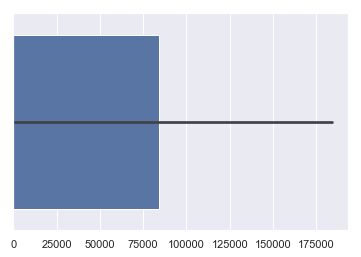

In [247]:
sns.barplot(data_set.values)

In [248]:
len(np.unique(survey["State"]))

56

In [249]:
unique_hospital_by_state = survey.groupby(["State"]).agg({"Hospital Name":"nunique"}, axis=0).sort_values(by="Hospital Name", ascending=0)
# survey.groupby(["State"]).agg({"Provider ID":"nunique"}) 
unique_hospital_by_state.head(10)

,Hospital Name
State,
TX,402
CA,344
FL,191
IL,183
PA,178
NY,178
OH,169
KS,139
MI,136


In [250]:
complic_unique_hospital_by_state = complications.groupby(['State']).agg({'Hospital Name':"nunique"}, axis=0).sort_values(by="Hospital Name", ascending=0)
complic_unique_hospital_by_state.head()

complic_unique_hospital_by_state = complications.groupby(['HCAHPS Measure ID']).agg({'Hospital Name':"nunique"}, axis=0).sort_values(by="Hospital Name", ascending=0)



KeyError: 'HCAHPS Measure ID'

Text(0, 0.5, 'Counts')

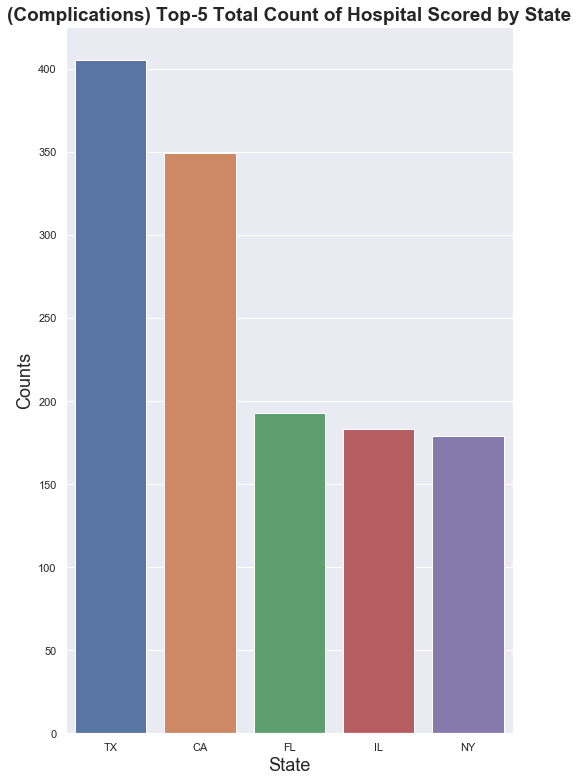

In [263]:
bar_plot_data = complic_unique_hospital_by_state.reset_index()
sns.set()
plt.figure(figsize=(8,13))
sns.barplot(x="State", y="Hospital Name", data=bar_plot_data[0:5])
plt.title("(Complications) Top-5 Total Count of Hospital Scored by State", fontsize=19, **{"fontweight":"semibold"})
plt.xlabel("State",fontsize=18)
plt.ylabel("Counts",fontsize=18)

Text(0, 0.5, 'Counts')

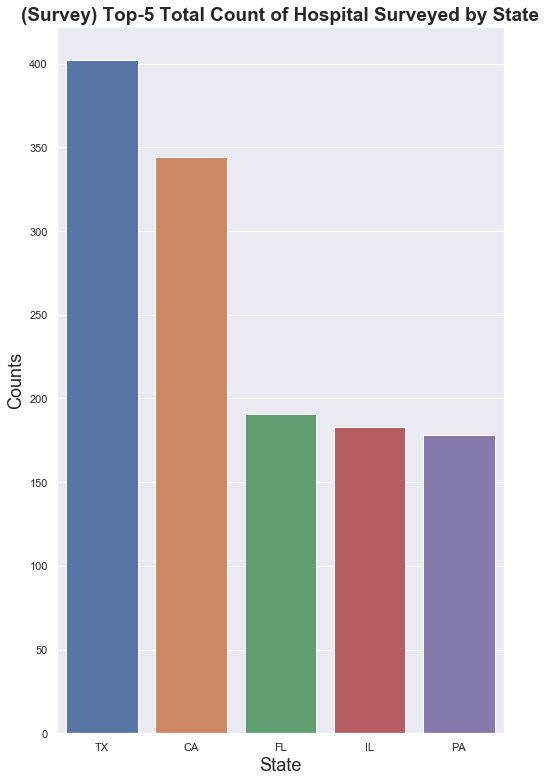

In [268]:
bar_plot_data = unique_hospital_by_state.reset_index()
sns.set()
plt.figure(figsize=(8,13))
sns.barplot(x="State", y="Hospital Name", data=bar_plot_data[0:5])
plt.title("(Survey) Top-5 Total Count of Hospital Surveyed by State", fontsize=19, **{"fontweight":"semibold"})
plt.xlabel("State",fontsize=18)
plt.ylabel("Counts",fontsize=18)

In [188]:
bar_plot_data.head(2)

,State,Hospital Name
0,TX,405
1,CA,349


[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

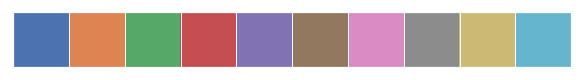

In [198]:
sns.palplot(sns.color_palette())
sns.color_palette()


In [200]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245450 entries, 0 to 245449
Data columns (total 23 columns):
Provider ID                              245450 non-null object
Hospital Name                            245450 non-null object
Address                                  245450 non-null object
City                                     245450 non-null object
State                                    245450 non-null object
ZIP Code                                 245450 non-null int64
County Name                              244800 non-null object
Phone Number                             245450 non-null int64
HCAHPS Measure ID                        245450 non-null object
HCAHPS Question                          245450 non-null object
HCAHPS Answer Description                245450 non-null object
Patient Survey Star Rating               38819 non-null float64
Patient Survey Star Rating Footnote      15180 non-null object
HCAHPS Answer Percent                    122612 non-null flo

In [199]:
linear_score_col = ['H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE',
       'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
       'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']

In [ ]:
survey.groupby(['State','HCAHPS Measure ID'])

## Exploring little bit about `HCAHPS Measure ID` and `HCAHPS Question`

In [12]:
survey["HCAHPS Measure ID"].unique()

array(['H_COMP_5_LINEAR_SCORE', 'H_COMP_1_SN_P', 'H_COMP_5_STAR_RATING',
       'H_STAR_RATING', 'H_COMP_5_SN_P', 'H_HSP_RATING_STAR_RATING',
       'H_CLEAN_LINEAR_SCORE', 'H_HSP_RATING_7_8', 'H_COMP_7_D_SD',
       'H_RECMND_LINEAR_SCORE', 'H_COMP_7_STAR_RATING',
       'H_COMP_7_LINEAR_SCORE', 'H_COMP_7_A', 'H_HSP_RATING_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_1_U_P', 'H_COMP_3_STAR_RATING',
       'H_CLEAN_HSP_A_P', 'H_HSP_RATING_0_6', 'H_QUIET_HSP_A_P',
       'H_RECMND_DN', 'H_COMP_2_U_P', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_3_SN_P', 'H_COMP_6_LINEAR_SCORE', 'H_CLEAN_HSP_SN_P',
       'H_CLEAN_HSP_U_P', 'H_CLEAN_STAR_RATING', 'H_COMP_1_A_P',
       'H_COMP_1_STAR_RATING', 'H_COMP_2_A_P', 'H_COMP_2_SN_P',
       'H_COMP_2_STAR_RATING', 'H_COMP_3_A_P', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_3_U_P', 'H_COMP_5_A_P', 'H_COMP_5_U_P', 'H_COMP_6_N_P',
       'H_COMP_6_STAR_RATING', 'H_COMP_6_Y_P', 'H_COMP_7_SA',
       'H_HSP_RATING_9_10', 'H_QUIET_HSP_SN_P', 'H_QUIET

So look like there are a total of `50` `HCAHPS Measure ID` accorss the dataset.

In [13]:
len(survey["HCAHPS Measure ID"].unique())

50

And the same for `HCAHPS Question`

In [14]:
len(survey["HCAHPS Question"].unique())

50

Making sure that `HCAHPS Measure ID` is a code for `HCAHPS Question`

### This confirms that for each question there is a mesure id. So we could use either the measure id or question as our columns

In [15]:
survey.groupby(["HCAHPS Measure ID","HCAHPS Question"]).size().reset_index().rename(columns={0:'count'})

,HCAHPS Measure ID,HCAHPS Question,count
0,H_CLEAN_HSP_A_P,Patients who reported that their room and bath...,4909
1,H_CLEAN_HSP_SN_P,Patients who reported that their room and bath...,4909
2,H_CLEAN_HSP_U_P,Patients who reported that their room and bath...,4909
3,H_CLEAN_LINEAR_SCORE,Cleanliness - linear mean score,4909
4,H_CLEAN_STAR_RATING,Cleanliness - star rating,4909
5,H_COMP_1_A_P,"Patients who reported that their nurses ""Alway...",4909
6,H_COMP_1_LINEAR_SCORE,Nurse communication - linear mean score,4909
7,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",4909
8,H_COMP_1_STAR_RATING,Nurse communication - star rating,4909
9,H_COMP_1_U_P,"Patients who reported that their nurses ""Usual...",4909


## Total number of surveys completed by state

In [16]:
survey["Number of Completed Surveys"].fillna(0, inplace=True)

In [17]:
total_surveys = survey.groupby(["State","Hospital Name","Number of Completed Surveys"]).agg({"Number of Completed Surveys":"max"}).rename(columns={'Number of Completed Surveys':'duplicate'})

# [["Number of Completed Surveys"]].sum()
# [["State","Number of Completed Surveys"]]

# .agg({"Number of Completed Surveys":pd.Series.nunique}, axis=0)
total_surveys.head()
# print(type(unique_hospital_by_state))
# .sort_values(by="Hospital Name", ascending=True)
# survey.groupby(["State"]).agg({"Provider ID":"nunique"}) 
# unique_hospital_by_state.head(10)
# unique_hospital_by_state.reset_index()

duplicate
State Hospital Name                      Number of Completed Surveys           
AK    ALASKA NATIVE MEDICAL CENTER       1114.0                          1114.0
      ALASKA REGIONAL HOSPITAL           1217.0                          1217.0
      BARTLETT REGIONAL HOSPITAL         269.0                            269.0
      CENTRAL PENINSULA GENERAL HOSPITAL 403.0                            403.0
      CORDOVA COMMUNITY MEDICAL CENTER   0.0                                0.0

In [18]:
total_surveys = total_surveys.reset_index()
total_surveys.drop(["duplicate"], axis=1, inplace=True)

In [19]:
total_surveys.head(2)

,State,Hospital Name,Number of Completed Surveys
0,AK,ALASKA NATIVE MEDICAL CENTER,1114.0
1,AK,ALASKA REGIONAL HOSPITAL,1217.0


In [20]:
total_surveys_filter = total_surveys.groupby(["State"])

In [21]:
total_surveys_filter.get_group("DE")

,State,Hospital Name,Number of Completed Surveys
748,DE,ALFRED I DUPONT HOSPITAL FOR CHILDREN,0.0
749,DE,BAYHEALTH - MILFORD MEMORIAL HOSPITAL,751.0
750,DE,"BAYHEALTH HOSPITAL, KENT CAMPUS",956.0
751,DE,BEEBE MEDICAL CENTER,500.0
752,DE,"CHRISTIANA CARE HEALTH SERVICES, INC.",897.0
753,DE,NANTICOKE MEMORIAL HOSPITAL,708.0
754,DE,ST FRANCIS HOSPITAL,565.0
755,DE,WILMINGTON VA MEDICAL CENTER,282.0


In [22]:
total_surveys_filter = total_surveys.groupby(["State"]).sum().sort_values(by="Number of Completed Surveys", ascending=False).reset_index()

Text(0, 0.5, 'Counts')

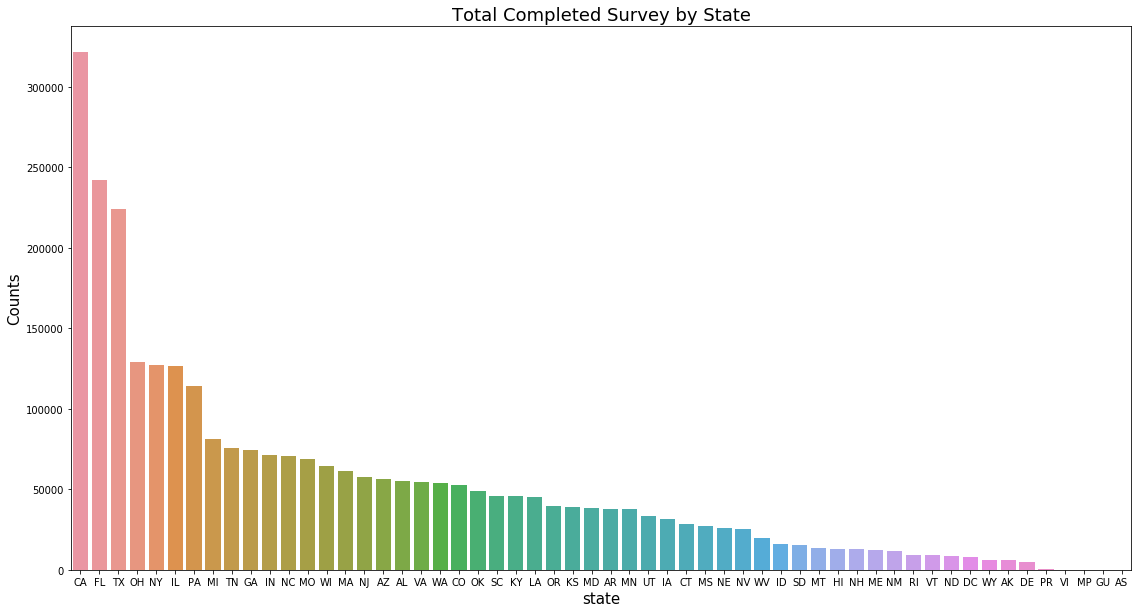

In [23]:
fig = plt.figure(figsize=(19,10))
sns.barplot(x="State", y="Number of Completed Surveys", data=total_surveys_filter)
plt.title("Total Completed Survey by State", fontsize=18)
plt.xlabel("state",fontsize=15)
plt.ylabel("Counts",fontsize=15)

# Pivot'ing the data as suggested in the call (pending)

In [24]:
survey.head(2)

,Provider ID,Hospital Name,City,State,ZIP Code,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,241335,ST ELIZABETH MEDICAL CENTER,WABASHA,MN,55981,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,Communication about medicines - linear mean score,NaN,NaN,NaN,NaN,NaN,58.0,6 - Fewer than 100 patients completed the HCAH...,34.0,6 - Fewer than 100 patients completed the HCAH...
1,241322,RAINY LAKE MEDICAL CENTER,INTERNATIONAL FALLS,MN,56649,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",NaN,NaN,4.0,6 - Fewer than 100 patients completed the HCAH...,NaN,86.0,6 - Fewer than 100 patients completed the HCAH...,32.0,6 - Fewer than 100 patients completed the HCAH...


In [25]:
survey.pivot(index='Provider ID',columns='HCAHPS Measure ID', values=['Patient Survey Star Rating','HCAHPS Answer Percent'])

Patient Survey Star Rating                                   \
HCAHPS Measure ID            H_CLEAN_HSP_A_P H_CLEAN_HSP_SN_P H_CLEAN_HSP_U_P   
Provider ID                                                                     
010001                                   NaN              NaN             NaN   
010005                                   NaN              NaN             NaN   
010006                                   NaN              NaN             NaN   
010007                                   NaN              NaN             NaN   
010008                                   NaN              NaN             NaN   
010011                                   NaN              NaN             NaN   
010012                                   NaN              NaN             NaN   
010016                                   NaN              NaN             NaN   
010018                                   NaN              NaN             NaN   
010019                                   NaN              NaN             NaN   
010021                                   NaN              NaN             NaN   
010022                                   NaN              NaN             NaN   
010023                                   NaN              NaN             NaN   
010024                                   NaN              NaN             NaN   
010029                                   NaN              NaN             NaN   
010032                                   NaN              NaN             NaN   
010033                                   NaN              NaN             NaN   
010034                                   NaN              NaN             NaN   
010035                                   NaN              NaN             NaN   
010036                                   NaN              NaN             NaN   
010038                                   NaN              NaN             NaN   
010039                                   NaN              NaN             NaN   
010040                                   NaN              NaN             NaN   
010044                                   NaN              NaN             NaN   
010045                                   NaN              NaN             NaN   
010046                                   NaN              NaN             NaN   
010047                                   NaN              NaN             NaN   
010049                                   NaN              NaN             NaN   
010051                                   NaN              NaN             NaN   
010052                                   NaN              NaN             NaN   
...                                      ...              ...             ...   
670082                                   NaN              NaN             NaN   
670083                                   NaN              NaN             NaN   
670085                                   NaN              NaN             NaN   
670087                                   NaN              NaN             NaN   
670088                                   NaN              NaN             NaN   
670090                                   NaN              NaN             NaN   
670093                                   NaN              NaN             NaN   
670094                                   NaN              NaN             NaN   
670095                                   NaN              NaN             NaN   
670097                                   NaN              NaN             NaN   
670098                                   NaN              NaN             NaN   
670099                                   NaN              NaN             NaN   
670102                                   NaN              NaN             NaN   
670103                                   NaN              NaN             NaN   
670106                                   NaN              NaN             NaN   
670107                                   NaN     

In [26]:
import numpy as np
np.where(survey.index.duplicated())
# 0 : Provider ID
# 1 : Hospital Name
# 2 : Address
# 3 : City
# 4 : State
# 5 : ZIP Code
# 6 : County Name
# 7 : Phone Number
# 8 : HCAHPS Measure ID
# 9 : HCAHPS Question
# 10 : HCAHPS Answer Description
# 11 : Patient Survey Star Rating
# 12 : Patient Survey Star Rating Footnote
# 13 : HCAHPS Answer Percent
# 14 : HCAHPS Answer Percent Footnote
# 15 : HCAHPS Linear Mean Value
# 16 : Number of Completed Surveys
# 17 : Number of Completed Surveys Footnote
# 18 : Survey Response Rate Percent
# 19 : Survey Response Rate Percent Footnote
# 20 : Measure Start Date
# 21 : Measure End Date
# 22 : Location

(array([], dtype=int64),)

In [27]:
survey.head(2)

,Provider ID,Hospital Name,City,State,ZIP Code,HCAHPS Measure ID,HCAHPS Question,HCAHPS Answer Description,Patient Survey Star Rating,Patient Survey Star Rating Footnote,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote
0,241335,ST ELIZABETH MEDICAL CENTER,WABASHA,MN,55981,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,Communication about medicines - linear mean score,NaN,NaN,NaN,NaN,NaN,58.0,6 - Fewer than 100 patients completed the HCAH...,34.0,6 - Fewer than 100 patients completed the HCAH...
1,241322,RAINY LAKE MEDICAL CENTER,INTERNATIONAL FALLS,MN,56649,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...","Nurses ""sometimes"" or ""never"" communicated well",NaN,NaN,4.0,6 - Fewer than 100 patients completed the HCAH...,NaN,86.0,6 - Fewer than 100 patients completed the HCAH...,32.0,6 - Fewer than 100 patients completed the HCAH...


In [1]:
def initial_checks(df, col):
    print('Total Counts', df[col].count())
    print('Total Nulls', df[col].isnull().sum() )
    print('Unique', df[col].unique())
    print("Data Type", df[col].dtype)

In [ ]:
survey, complications

In [6]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245450 entries, 0 to 245449
Data columns (total 23 columns):
Provider ID                              245450 non-null object
Hospital Name                            245450 non-null object
Address                                  245450 non-null object
City                                     245450 non-null object
State                                    245450 non-null object
ZIP Code                                 245450 non-null int64
County Name                              244800 non-null object
Phone Number                             245450 non-null int64
HCAHPS Measure ID                        245450 non-null object
HCAHPS Question                          245450 non-null object
HCAHPS Answer Description                245450 non-null object
Patient Survey Star Rating               38819 non-null float64
Patient Survey Star Rating Footnote      15180 non-null object
HCAHPS Answer Percent                    122612 non-null flo

# HCAHPS Measure ID

In [7]:
initial_checks(survey, 'HCAHPS Measure ID')

Total Counts 245450
Total Nulls 0
Unique ['H_COMP_5_LINEAR_SCORE' 'H_COMP_1_SN_P' 'H_COMP_5_STAR_RATING'
 'H_STAR_RATING' 'H_COMP_5_SN_P' 'H_HSP_RATING_STAR_RATING'
 'H_CLEAN_LINEAR_SCORE' 'H_HSP_RATING_7_8' 'H_COMP_7_D_SD'
 'H_RECMND_LINEAR_SCORE' 'H_COMP_7_STAR_RATING' 'H_COMP_7_LINEAR_SCORE'
 'H_COMP_7_A' 'H_HSP_RATING_LINEAR_SCORE' 'H_COMP_2_LINEAR_SCORE'
 'H_COMP_1_U_P' 'H_COMP_3_STAR_RATING' 'H_CLEAN_HSP_A_P'
 'H_HSP_RATING_0_6' 'H_QUIET_HSP_A_P' 'H_RECMND_DN' 'H_COMP_2_U_P'
 'H_COMP_1_LINEAR_SCORE' 'H_COMP_3_SN_P' 'H_COMP_6_LINEAR_SCORE'
 'H_CLEAN_HSP_SN_P' 'H_CLEAN_HSP_U_P' 'H_CLEAN_STAR_RATING' 'H_COMP_1_A_P'
 'H_COMP_1_STAR_RATING' 'H_COMP_2_A_P' 'H_COMP_2_SN_P'
 'H_COMP_2_STAR_RATING' 'H_COMP_3_A_P' 'H_COMP_3_LINEAR_SCORE'
 'H_COMP_3_U_P' 'H_COMP_5_A_P' 'H_COMP_5_U_P' 'H_COMP_6_N_P'
 'H_COMP_6_STAR_RATING' 'H_COMP_6_Y_P' 'H_COMP_7_SA' 'H_HSP_RATING_9_10'
 'H_QUIET_HSP_SN_P' 'H_QUIET_HSP_U_P' 'H_QUIET_LINEAR_SCORE'
 'H_QUIET_STAR_RATING' 'H_RECMND_DY' 'H_RECMND_PY' 'H_RECMND_

In [21]:
for i in survey['HCAHPS Measure ID'].unique():
    if 'LINEAR'in i:
        print(i, '****')
    else:
        print(i)

H_COMP_5_LINEAR_SCORE ****
H_COMP_1_SN_P
H_COMP_5_STAR_RATING
H_STAR_RATING
H_COMP_5_SN_P
H_HSP_RATING_STAR_RATING
H_CLEAN_LINEAR_SCORE ****
H_HSP_RATING_7_8
H_COMP_7_D_SD
H_RECMND_LINEAR_SCORE ****
H_COMP_7_STAR_RATING
H_COMP_7_LINEAR_SCORE ****
H_COMP_7_A
H_HSP_RATING_LINEAR_SCORE ****
H_COMP_2_LINEAR_SCORE ****
H_COMP_1_U_P
H_COMP_3_STAR_RATING
H_CLEAN_HSP_A_P
H_HSP_RATING_0_6
H_QUIET_HSP_A_P
H_RECMND_DN
H_COMP_2_U_P
H_COMP_1_LINEAR_SCORE ****
H_COMP_3_SN_P
H_COMP_6_LINEAR_SCORE ****
H_CLEAN_HSP_SN_P
H_CLEAN_HSP_U_P
H_CLEAN_STAR_RATING
H_COMP_1_A_P
H_COMP_1_STAR_RATING
H_COMP_2_A_P
H_COMP_2_SN_P
H_COMP_2_STAR_RATING
H_COMP_3_A_P
H_COMP_3_LINEAR_SCORE ****
H_COMP_3_U_P
H_COMP_5_A_P
H_COMP_5_U_P
H_COMP_6_N_P
H_COMP_6_STAR_RATING
H_COMP_6_Y_P
H_COMP_7_SA
H_HSP_RATING_9_10
H_QUIET_HSP_SN_P
H_QUIET_HSP_U_P
H_QUIET_LINEAR_SCORE ****
H_QUIET_STAR_RATING
H_RECMND_DY
H_RECMND_PY
H_RECMND_STAR_RATING


In [14]:
complications.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92155 entries, 0 to 92154
Data columns (total 19 columns):
Provider ID             92155 non-null object
Hospital Name           92155 non-null object
Address                 92155 non-null object
City                    92155 non-null object
State                   92155 non-null object
ZIP Code                92155 non-null int64
County Name             91934 non-null object
Phone Number            92155 non-null int64
Measure Name            92155 non-null object
Measure ID              92155 non-null object
Compared to National    92155 non-null object
Denominator             92155 non-null object
Score                   92155 non-null object
Lower Estimate          92155 non-null object
Higher Estimate         92155 non-null object
Footnote                37846 non-null object
Measure Start Date      92155 non-null object
Measure End Date        92155 non-null object
Location                92155 non-null object
dtypes: int64(2), o

In [15]:
initial_checks(complications, 'Measure ID')

Total Counts 92155
Total Nulls 0
Unique ['COMP_HIP_KNEE' 'PSI_3_ULCER' 'MORT_30_STK' 'PSI_10_POST_KIDNEY'
 'PSI_4_SURG_COMP' 'PSI_12_POSTOP_PULMEMB_DVT' 'MORT_30_PN'
 'PSI_11_POST_RESP' 'PSI_14_POSTOP_DEHIS' 'MORT_30_AMI' 'PSI_9_POST_HEM'
 'PSI_13_POST_SEPSIS' 'MORT_30_CABG' 'MORT_30_COPD' 'MORT_30_HF'
 'PSI_15_ACC_LAC' 'PSI_6_IAT_PTX' 'PSI_8_POST_HIP' 'PSI_90_SAFETY']
Data Type object


In [17]:
for idx, i in enumerate(complications['Measure ID'].unique()):
    print(idx+1, i)

1 COMP_HIP_KNEE
2 PSI_3_ULCER
3 MORT_30_STK
4 PSI_10_POST_KIDNEY
5 PSI_4_SURG_COMP
6 PSI_12_POSTOP_PULMEMB_DVT
7 MORT_30_PN
8 PSI_11_POST_RESP
9 PSI_14_POSTOP_DEHIS
10 MORT_30_AMI
11 PSI_9_POST_HEM
12 PSI_13_POST_SEPSIS
13 MORT_30_CABG
14 MORT_30_COPD
15 MORT_30_HF
16 PSI_15_ACC_LAC
17 PSI_6_IAT_PTX
18 PSI_8_POST_HIP
19 PSI_90_SAFETY


## Loading Marin's code

In [201]:
# %load data_prep.py
import pandas as pd
import numpy as np
import os

# read files (need to update to zip files on github)
# os.chdir('./Data Mining/Group Project')
outcomes = pd.read_csv('./Data/Complications_and_Deaths_-_Hospital.csv')
survey = pd.read_csv('./Data/Patient_survey__HCAHPS__-_Hospital.csv')

In [202]:
measure_id_unique_values = outcomes['Measure ID'].unique()
print(measure_id_unique_values)
print(len(measure_id_unique_values))

['COMP_HIP_KNEE' 'PSI_3_ULCER' 'MORT_30_STK' 'PSI_10_POST_KIDNEY'
 'PSI_4_SURG_COMP' 'PSI_12_POSTOP_PULMEMB_DVT' 'MORT_30_PN'
 'PSI_11_POST_RESP' 'PSI_14_POSTOP_DEHIS' 'MORT_30_AMI' 'PSI_9_POST_HEM'
 'PSI_13_POST_SEPSIS' 'MORT_30_CABG' 'MORT_30_COPD' 'MORT_30_HF'
 'PSI_15_ACC_LAC' 'PSI_6_IAT_PTX' 'PSI_8_POST_HIP' 'PSI_90_SAFETY']
19


In [214]:
# pivot outcomes data
outcomes_pivot = outcomes.pivot(index='Provider ID', columns='Measure ID', values='Score').reset_index()
outcomes_pivot.head()
outcomes_pivot.describe()

Measure ID,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM
count,4944,4944,4944,4944,4807,4944,4944,4944,4807,4807,4807,4807,4807,4807,4807,4807,4807,4807,4807,4807
unique,4944,41,84,59,82,110,137,104,205,980,465,520,163,158,189,1497,43,11,122,230
top,340145,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0.11,Not Available,Not Available
freq,1,2213,2533,3930,1256,1287,768,2373,2066,2089,1837,2082,2060,1872,1642,3101,1621,1838,1593,1841


KeyError: "None of [Index(['COMP_HIP_KNEE'], dtype='object')] are in the [columns]"

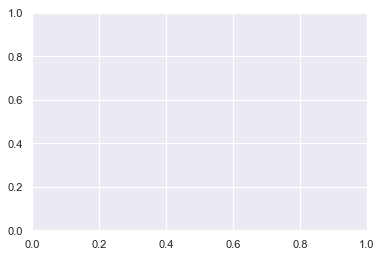

In [227]:
# plt.plot([0,20], outcomes_pivot.loc[:,["COMP_HIP_KNEE",'MORT_30_AMI']])
# outcomes_pivot.plot.line()
# df = pd.DataFrame({
# 'pig': [20, 18, 489, 675, 1776],
# 'horse': [4, 25, 281, 600, 1900]
#  }, index=[1990, 1997, 2003, 2009, 2014])
# lines = df.plot.line()
# df

# plt.boxplot(outcomes_pivot.loc[:,['COMP_HIP_KNEE']])

# plt.plot(list(range(0,500)), )
# outcomes_pivot.loc[:,["COMP_HIP_KNEE",'MORT_30_AMI']]

outcomes_pivot.boxplot(column=["COMP_HIP_KNEE"])
# outcomes_pivot.head()
# type(outcomes_pivot)
# outcomes_pivot.loc[:,['COMP_HIP_KNEE']]

In [4]:
np.count_nonzero(outcomes_pivot.columns)

20

In [5]:
# write to file for QA
# outcomes_pivot.to_csv(path_or_buf=
#                       'C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/outcomesPivot2.csv')

# pivot survey data
survey_pivot = survey.pivot(index='Provider ID', columns='HCAHPS Measure ID',
                            values='HCAHPS Linear Mean Value').reset_index()
survey_pivot.head()

HCAHPS Measure ID,Provider ID,H_CLEAN_HSP_A_P,H_CLEAN_HSP_SN_P,H_CLEAN_HSP_U_P,H_CLEAN_LINEAR_SCORE,H_CLEAN_STAR_RATING,H_COMP_1_A_P,H_COMP_1_LINEAR_SCORE,H_COMP_1_SN_P,H_COMP_1_STAR_RATING,...,H_QUIET_HSP_SN_P,H_QUIET_HSP_U_P,H_QUIET_LINEAR_SCORE,H_QUIET_STAR_RATING,H_RECMND_DN,H_RECMND_DY,H_RECMND_LINEAR_SCORE,H_RECMND_PY,H_RECMND_STAR_RATING,H_STAR_RATING
0,010001,Not Applicable,Not Applicable,Not Applicable,83,Not Applicable,Not Applicable,87,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,86,Not Applicable,Not Applicable,Not Applicable,84,Not Applicable,Not Applicable,Not Applicable
1,010005,Not Applicable,Not Applicable,Not Applicable,87,Not Applicable,Not Applicable,91,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,85,Not Applicable,Not Applicable,Not Applicable,88,Not Applicable,Not Applicable,Not Applicable
2,010006,Not Applicable,Not Applicable,Not Applicable,79,Not Applicable,Not Applicable,89,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,82,Not Applicable,Not Applicable,Not Applicable,84,Not Applicable,Not Applicable,Not Applicable
3,010007,Not Applicable,Not Applicable,Not Applicable,86,Not Applicable,Not Applicable,89,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,86,Not Applicable,Not Applicable,Not Applicable,85,Not Applicable,Not Applicable,Not Applicable
4,010008,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Applicable,Not Applicable,Not Available,Not Applicable,Not Applicable,...,Not Applicable,Not Applicable,Not Available,Not Applicable,Not Applicable,Not Applicable,Not Available,Not Applicable,Not Applicable,Not Applicable


 Quick check to see if provider is duplicated for any of the columns (HCAHPS Measure ID)

In [6]:
check_if_provider_id_duplicated = survey_pivot.groupby(['Provider ID']).agg({'Provider ID':'count'}).rename(columns={"Provider ID":"count"}).reset_index()
check_if_provider_id_duplicated.head()
check_if_provider_id_duplicated[check_if_provider_id_duplicated['count']>1]

,Provider ID,count


In [7]:
len(['H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
                                     'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
                                     'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
                                     'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE'])

10

In [8]:
# write to file for QA
# survey_pivot.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/surveyPivot2.csv')

# drop all columns that are not linear mean scores
survey_pivot_trimmed = survey_pivot[['Provider ID', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
                                     'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
                                     'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
                                     'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']]

# survey_pivot_trimmed.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/surveyPivotTrimmed.csv')

# merge dataframes together using Provider ID as join key
df = outcomes_pivot.merge(survey_pivot_trimmed, how='outer', on='Provider ID')
# df.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/joinedData.csv')
df.head()

,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,...,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,010001,3,14.5,4.5,8.9,12.5,16.2,13.7,0.65,6.02,...,83,87,90,75,70,85,79,83,86,84
1,010005,3,15.5,Not Available,10.9,15.3,20.8,15.7,1.10,12.17,...,87,91,94,85,81,88,81,88,85,88
2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,7.19,...,79,89,91,83,76,83,80,84,82,84
3,010007,2.8,Not Available,Not Available,8.3,13.3,21.6,15.9,1.30,9.46,...,86,89,94,84,79,85,80,85,86,85
4,010008,Not Available,Not Available,Not Available,8,12.9,15.7,Not Available,Not Available,Not Available,...,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [9]:
df.shape

(4944, 30)

In [10]:
# checking counts of the duplicates
survey.groupby(['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
                   'Number of Completed Surveys', 'Survey Response Rate Percent'],as_index=False).size().reset_index().head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent,0
0,010001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,506,21,50
1,010005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,1135,34,50
2,010006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,579,22,50
3,010007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,185,27,50
4,010008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,63,31,50


In [11]:
survey.groupby(["Provider ID",'Survey Response Rate Percent'],as_index=False).size().reset_index().head()

,Provider ID,Survey Response Rate Percent,0
0,010001,21,50
1,010005,34,50
2,010006,22,50
3,010007,27,50
4,010008,31,50


In [12]:
# add back hospital metadata columns - location fields, number of survey responses
metadata = survey[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
                   'Number of Completed Surveys', 'Survey Response Rate Percent']].drop_duplicates()
# metadata.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/metadata2.csv')

df_full = df.merge(metadata, how='left', on='Provider ID')
# df_full.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/fullData.csv')

# replace 'Not Available' values with blanks
df_full.replace(to_replace=['Not Available', 'Not Applicable'], value=[np.nan, np.nan], inplace=True)
# df_full.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/fullDataReplaced.csv')

In [13]:
#AbCdEfGhIjKlMnOpQrStUvWxYz
df_full.head()

,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,...,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
0,010001,3,14.5,4.5,8.9,12.5,16.2,13.7,0.65,6.02,...,83,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506,21
1,010005,3,15.5,NaN,10.9,15.3,20.8,15.7,1.10,12.17,...,88,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,1135,34
2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,7.19,...,84,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579,22
3,010007,2.8,NaN,NaN,8.3,13.3,21.6,15.9,1.30,9.46,...,85,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,185,27
4,010008,NaN,NaN,NaN,8,12.9,15.7,NaN,NaN,NaN,...,NaN,NaN,NaN,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049.0,63,31


### Counts of each column

In [41]:

df_full.iloc[:,list(range(1,30))].describe()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,...,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
count,2731,2411,1014,3551,3657,4176,2571,2741,2718,2970,...,3529,3529,3529,3529,3529,3529,3529,3529,3529,3529
unique,40,83,58,81,109,136,103,204,979,464,...,27,24,24,34,36,30,27,28,37,36
top,2.5,12.8,2.6,8.1,11.8,15.4,14.8,1.30,6.41,3.65,...,87,92,92,85,78,87,83,89,83,90
freq,268,98,60,156,106,110,76,228,11,31,...,364,676,665,353,385,468,574,492,294,375


# filling na as 0's vs dropping na's

In [42]:
df_full.fillna(0).head()

,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,...,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
0,010001,3,14.5,4.5,8.9,12.5,16.2,13.7,0.65,6.02,...,83,86,84,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506,21
1,010005,3,15.5,0,10.9,15.3,20.8,15.7,1.10,12.17,...,88,85,88,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,1135,34
2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,7.19,...,84,82,84,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579,22
3,010007,2.8,0,0,8.3,13.3,21.6,15.9,1.30,9.46,...,85,86,85,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,185,27
4,010008,0,0,0,8,12.9,15.7,0,0,0,...,0,0,0,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049.0,63,31


## Before Dropping NA.

In [43]:
rows_by_state_before_dropping_na = df_full.groupby(['State']).agg({"State":"count"}).rename(columns={'State':'count'}).reset_index().sort_values(by="count", ascending=False)
rows_by_state_before_dropping_na.head()

,State,count
47,TX,408
5,CA,348
10,FL,191
16,IL,185
41,PA,178


In [44]:
rows_by_state_before_dropping_na['count'].sum()

4909

## After dropping NA's

In [45]:
na_dropped_data = df_full.dropna()

In [46]:
rows_by_state_after_dropping_na = na_dropped_data.groupby(['State']).agg({"State":"count"}).rename(columns={'State':'count'}).reset_index().sort_values(by="count", ascending=False)

In [47]:
# plt.figure(figsize=(12,10))
# sns.barplot(x='State', y="count", data= rows_by_state)
rows_by_state_after_dropping_na.head()

,State,count
4,CA,91
43,TX,90
9,FL,68
14,IL,50
38,PA,49


In [48]:
rows_by_state_after_dropping_na['count'].sum()

942

## Dropping all instead of Any

In [49]:
na_dropped_data_all = df_full.dropna(how="all")
rows_by_state_after_dropping_na_all = na_dropped_data_all.groupby(['State']).agg({"State":"count"}).rename(columns={'State':'count'}).reset_index().sort_values(by="count", ascending=False)
rows_by_state_after_dropping_na_all.head()

,State,count
47,TX,408
5,CA,348
10,FL,191
16,IL,185
41,PA,178


In [135]:
rows_by_state_after_dropping_na_all['count'].sum()

4909

In [50]:
df_full.melt()

AttributeError: 'DataFrame' object has no attribute 'reshape'

# Applying KMeans to the data (unsupervise learning)

In [5]:
# %load data_prep.py
import pandas as pd
import numpy as np
import os

# read files (need to update to zip files on github)
# os.chdir('C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project')
outcomes = pd.read_csv('./Data/Complications_and_Deaths_-_Hospital.csv')
survey = pd.read_csv('./Data/Patient_survey__HCAHPS__-_Hospital.csv')

# pivot outcomes data
outcomes_pivot = outcomes.pivot(index='Provider ID', columns='Measure ID', values='Score').reset_index()
# print(outcomes_pivot)

# write to file for QA
# outcomes_pivot.to_csv(path_or_buf=
#                       'C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/outcomesPivot2.csv')

# pivot survey data
survey_pivot = survey.pivot(index='Provider ID', columns='HCAHPS Measure ID',
                            values='HCAHPS Linear Mean Value').reset_index()
# print(survey_pivot)

# write to file for QA
# survey_pivot.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/surveyPivot2.csv')

# drop all columns that are not linear mean scores
survey_pivot_trimmed = survey_pivot[['Provider ID', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
                                     'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE', 'H_COMP_5_LINEAR_SCORE',
                                     'H_COMP_6_LINEAR_SCORE', 'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
                                     'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']]

# survey_pivot_trimmed.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/surveyPivotTrimmed.csv')

# merge dataframes together using Provider ID as join key
df = outcomes_pivot.merge(survey_pivot_trimmed, how='outer', on='Provider ID')
# df.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/joinedData.csv')

# add back hospital metadata columns - location fields, number of survey responses
metadata = survey[['Provider ID', 'Hospital Name', 'Address', 'City', 'State', 'ZIP Code',
                   'Number of Completed Surveys', 'Survey Response Rate Percent']].drop_duplicates()
# metadata.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/metadata2.csv')

df_full = df.merge(metadata, how='left', on='Provider ID')
df_full.to_csv(path_or_buf='./Data/fullData.csv')

# replace 'Not Available' values with blanks
df_full.replace(to_replace=['Not Available', 'Not Applicable'], value=[np.nan, np.nan], inplace=True)
# df_full.to_csv(path_or_buf='C:/Users/mgow/Documents/UChicago/Courses/Data Mining/Group Project/fullDataReplaced.csv')


In [18]:
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster.hierarchy import fcluster
import pandas as pd
pd.set_option('display.max_columns', None)


data = pd.read_csv('./Data/fullData.csv', na_values=['Not Available', 'Not Applicable'])
data.columns

all_cols = ['COMP_HIP_KNEE', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP',
       'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
       'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER',
       'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX', 'PSI_8_POST_HIP', 'PSI_90_SAFETY',
       'PSI_9_POST_HEM', 'H_CLEAN_LINEAR_SCORE', 'H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE',
       'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
       'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']

linear_score_col = ['H_CLEAN_LINEAR_SCORE','H_COMP_1_LINEAR_SCORE',
       'H_COMP_2_LINEAR_SCORE', 'H_COMP_3_LINEAR_SCORE',
       'H_COMP_5_LINEAR_SCORE', 'H_COMP_6_LINEAR_SCORE',
       'H_COMP_7_LINEAR_SCORE', 'H_HSP_RATING_LINEAR_SCORE',
       'H_QUIET_LINEAR_SCORE', 'H_RECMND_LINEAR_SCORE']

non_linear_col = ['COMP_HIP_KNEE', 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK', 'PSI_10_POST_KIDNEY', 'PSI_11_POST_RESP',
       'PSI_12_POSTOP_PULMEMB_DVT', 'PSI_13_POST_SEPSIS',
       'PSI_14_POSTOP_DEHIS', 'PSI_15_ACC_LAC', 'PSI_3_ULCER',
       'PSI_4_SURG_COMP', 'PSI_6_IAT_PTX', 'PSI_8_POST_HIP', 'PSI_90_SAFETY',
       'PSI_9_POST_HEM']

mortality_col = [ 'MORT_30_AMI',
       'MORT_30_CABG', 'MORT_30_COPD', 'MORT_30_HF', 'MORT_30_PN',
       'MORT_30_STK']

data.head()

,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
0,0,010001,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301.0,506.0,21.0
1,1,010005,3.0,15.5,NaN,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957.0,1135.0,34.0
2,2,010006,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,7.19,3.31,4.95,0.65,1.38,0.46,181.42,0.30,0.11,0.97,3.38,79.0,89.0,91.0,83.0,76.0,83.0,80.0,84.0,82.0,84.0,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631.0,579.0,22.0
3,3,010007,2.8,NaN,NaN,8.3,13.3,21.6,15.9,1.30,9.46,4.76,5.11,0.84,1.26,0.27,NaN,0.28,0.11,1.04,2.56,86.0,89.0,94.0,84.0,79.0,85.0,80.0,85.0,86.0,85.0,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467.0,185.0,27.0
4,4,010008,NaN,NaN,NaN,8.0,12.9,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,0.29,0.11,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049.0,63.0,31.0


In [19]:
subset_data = data[all_cols]
subset_data.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0
1,3.0,15.5,NaN,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0
2,3.6,14.9,3.2,8.8,13.2,17.2,17.2,1.28,7.19,3.31,4.95,0.65,1.38,0.46,181.42,0.30,0.11,0.97,3.38,79.0,89.0,91.0,83.0,76.0,83.0,80.0,84.0,82.0,84.0
3,2.8,NaN,NaN,8.3,13.3,21.6,15.9,1.30,9.46,4.76,5.11,0.84,1.26,0.27,NaN,0.28,0.11,1.04,2.56,86.0,89.0,94.0,84.0,79.0,85.0,80.0,85.0,86.0,85.0
4,NaN,NaN,NaN,8.0,12.9,15.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.36,NaN,0.29,0.11,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
subset_data.head(2)

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,3.0,14.5,4.5,8.9,12.5,16.2,13.7,0.65,6.02,5.57,4.45,0.57,1.13,0.17,161.31,0.38,0.14,0.90,2.65,83.0,87.0,90.0,75.0,70.0,85.0,79.0,83.0,86.0,84.0
1,3.0,15.5,NaN,10.9,15.3,20.8,15.7,1.10,12.17,3.17,5.20,0.75,1.30,0.70,181.81,0.24,0.10,1.14,2.09,87.0,91.0,94.0,85.0,81.0,88.0,81.0,88.0,85.0,88.0


In [21]:
subset_data.dtypes

COMP_HIP_KNEE                float64
MORT_30_AMI                  float64
MORT_30_CABG                 float64
MORT_30_COPD                 float64
MORT_30_HF                   float64
MORT_30_PN                   float64
MORT_30_STK                  float64
PSI_10_POST_KIDNEY           float64
PSI_11_POST_RESP             float64
PSI_12_POSTOP_PULMEMB_DVT    float64
PSI_13_POST_SEPSIS           float64
PSI_14_POSTOP_DEHIS          float64
PSI_15_ACC_LAC               float64
PSI_3_ULCER                  float64
PSI_4_SURG_COMP              float64
PSI_6_IAT_PTX                float64
PSI_8_POST_HIP               float64
PSI_90_SAFETY                float64
PSI_9_POST_HEM               float64
H_CLEAN_LINEAR_SCORE         float64
H_COMP_1_LINEAR_SCORE        float64
H_COMP_2_LINEAR_SCORE        float64
H_COMP_3_LINEAR_SCORE        float64
H_COMP_5_LINEAR_SCORE        float64
H_COMP_6_LINEAR_SCORE        float64
H_COMP_7_LINEAR_SCORE        float64
H_HSP_RATING_LINEAR_SCORE    float64
H

In [22]:
subset_data = subset_data.apply(lambda x : x.fillna(x.mean()), axis=0)
subset_data.head()

,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE
0,3.000000,14.500000,4.500000,8.9,12.5,16.2,13.700000,0.650000,6.020000,5.570000,4.450000,0.570000,1.130000,0.17,161.310000,0.38,0.14,0.90,2.650000,83.000000,87.000000,90.000000,75.000000,70.00000,85.000000,79.000000,83.000000,86.000000,84.000000
1,3.000000,15.500000,3.230178,10.9,15.3,20.8,15.700000,1.100000,12.170000,3.170000,5.200000,0.750000,1.300000,0.70,181.810000,0.24,0.10,1.14,2.090000,87.000000,91.000000,94.000000,85.000000,81.00000,88.000000,81.000000,88.000000,85.000000,88.000000
2,3.600000,14.900000,3.200000,8.8,13.2,17.2,17.200000,1.280000,7.190000,3.310000,4.950000,0.650000,1.380000,0.46,181.420000,0.30,0.11,0.97,3.380000,79.000000,89.000000,91.000000,83.000000,76.00000,83.000000,80.000000,84.000000,82.000000,84.000000
3,2.800000,13.179386,3.230178,8.3,13.3,21.6,15.900000,1.300000,9.460000,4.760000,5.110000,0.840000,1.260000,0.27,161.794959,0.28,0.11,1.04,2.560000,86.000000,89.000000,94.000000,84.000000,79.00000,85.000000,80.000000,85.000000,86.000000,85.000000
4,2.596741,13.179386,3.230178,8.0,12.9,15.7,14.289226,1.307723,8.037586,3.811502,5.212011,0.857961,1.289843,0.36,161.794959,0.29,0.11,0.99,2.588898,87.965146,91.375177,91.430434,85.736753,79.20119,87.199207,81.911873,88.447152,82.239445,88.086427


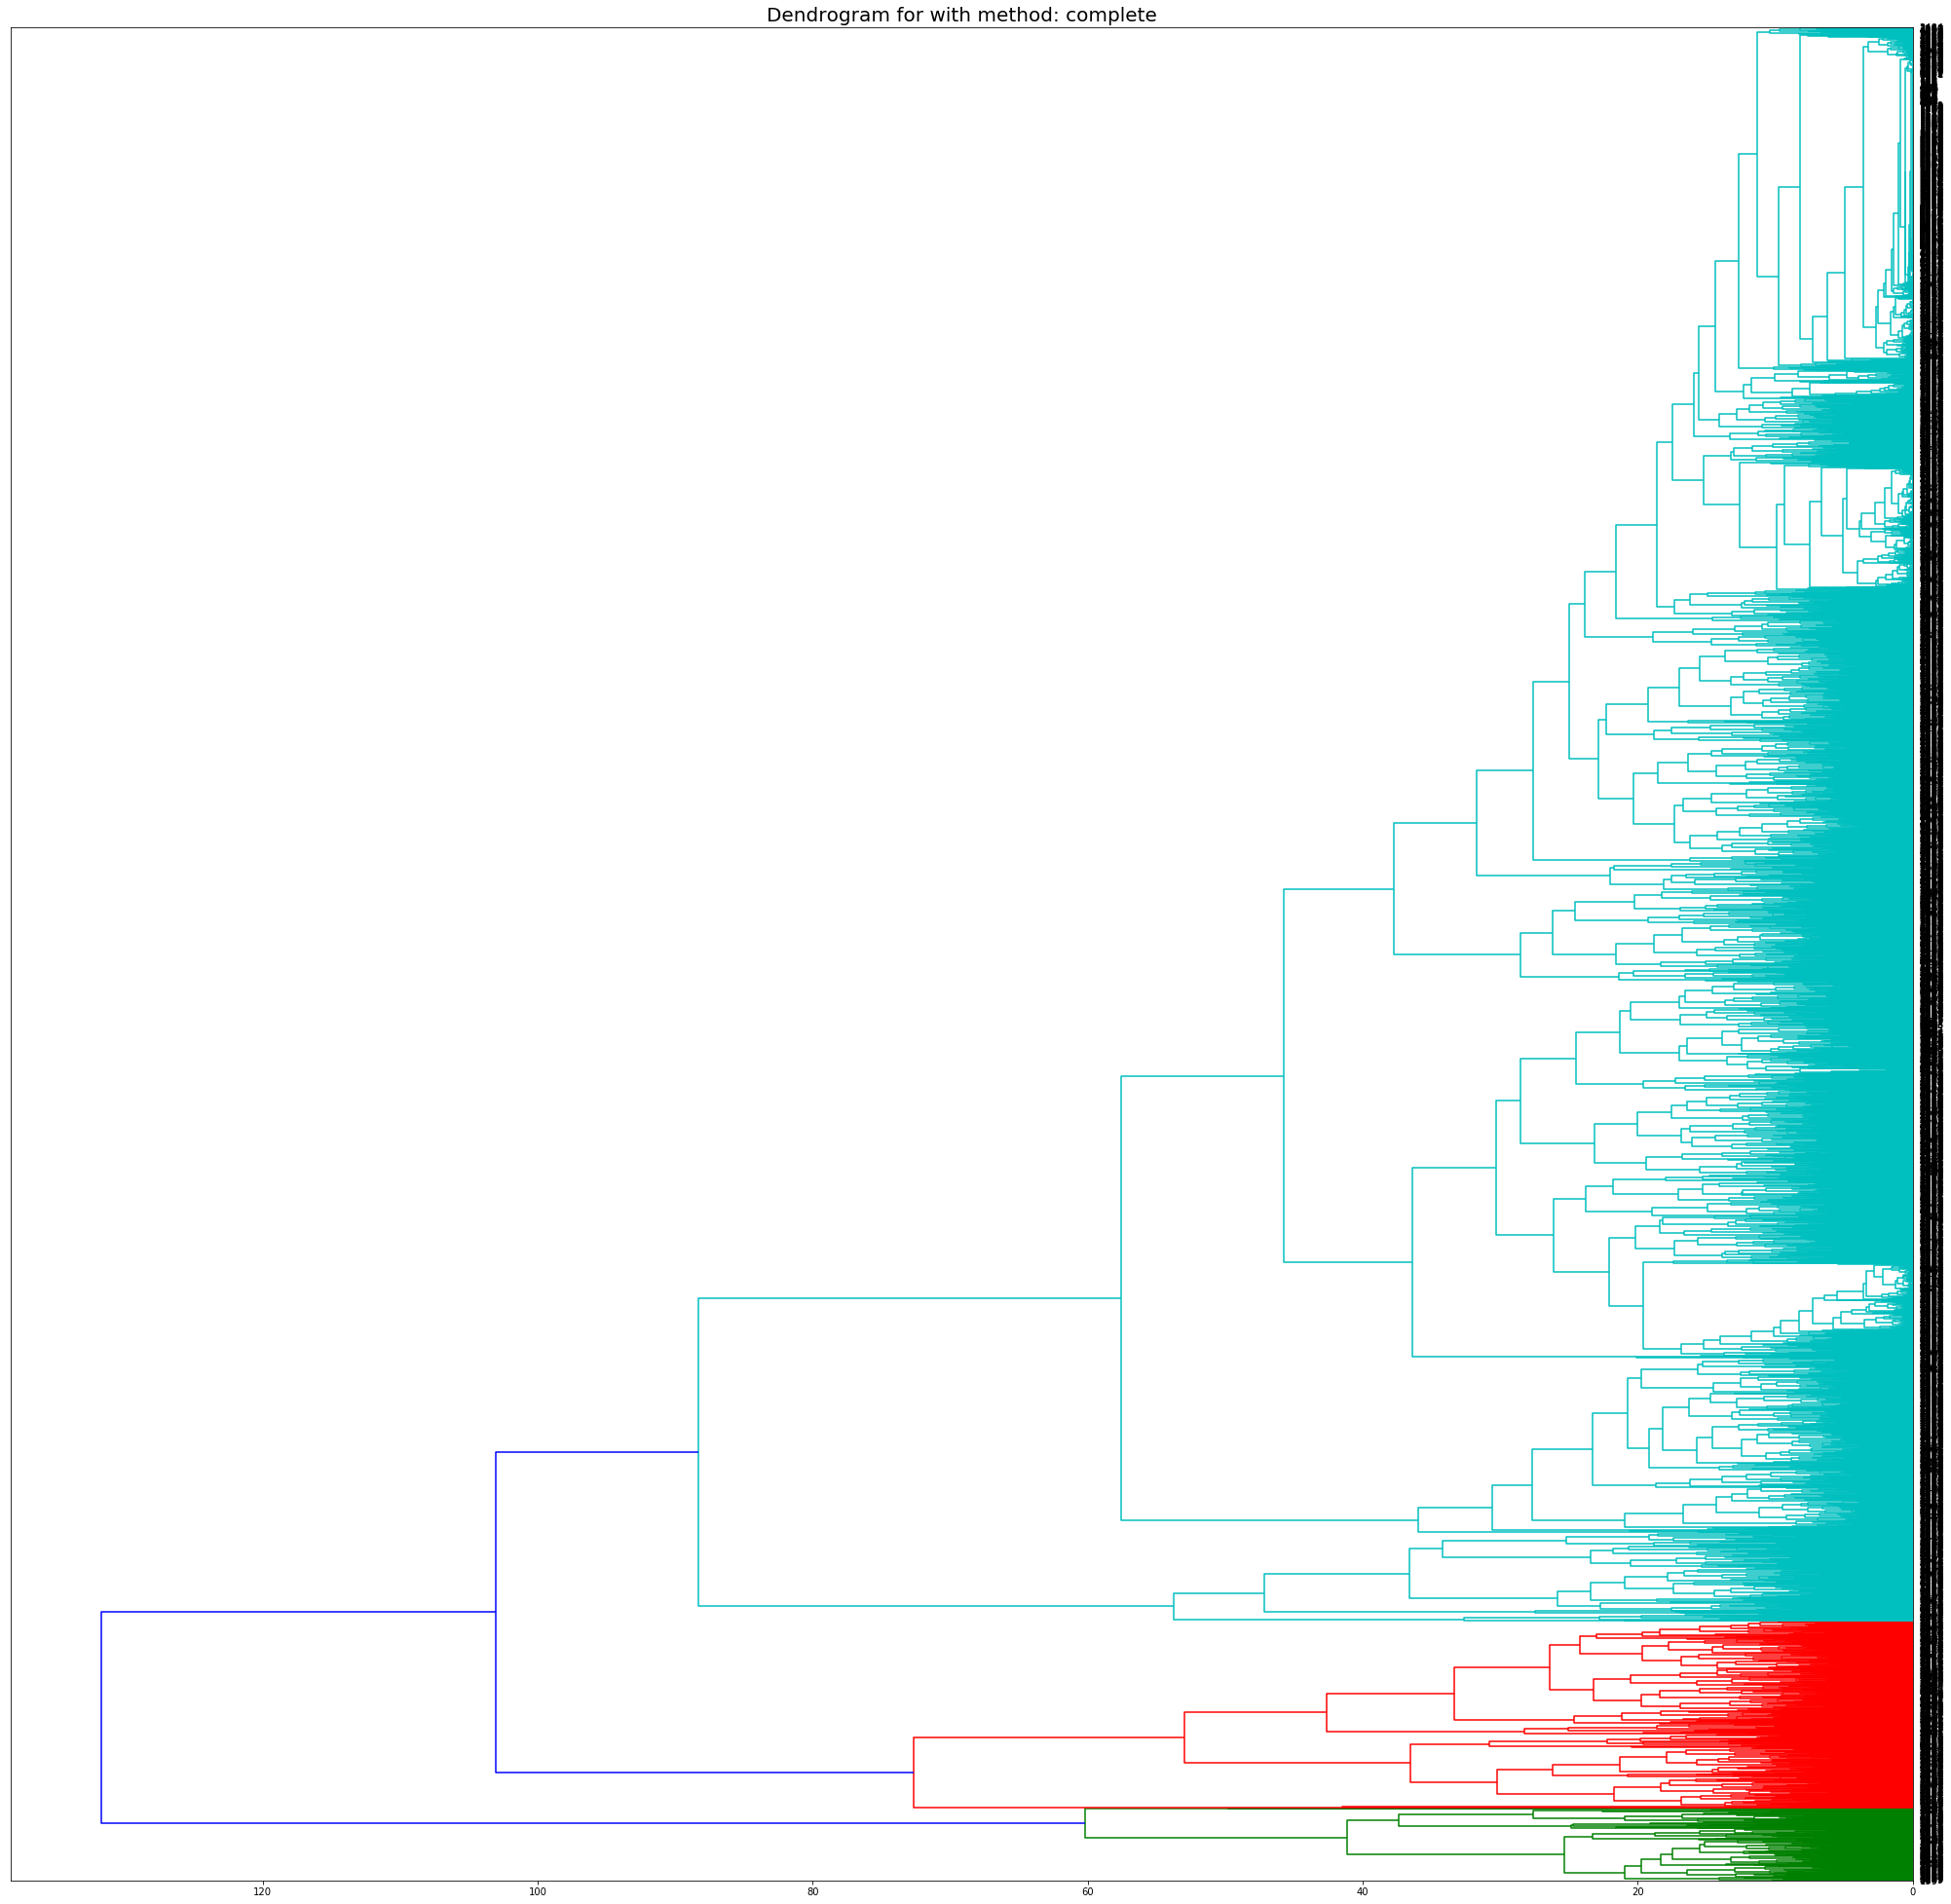

In [33]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
# data2 = StandardScaler().fit(subset_data)

import matplotlib.pyplot as plt
methods = ["complete"]#,"average", "weighted","centroid","ward"]
for idx, method in enumerate(methods):
    plt.figure(figsize=(35,35))


    mergings = linkage(subset_data, method=method)

    labels = fcluster(mergings, 120, criterion='distance')

    dendrogram(mergings, leaf_rotation=0, leaf_font_size=10,
               orientation="left"
              )#orientation="left"

    my_palette = plt.cm.get_cmap("Accent", 3)
    plt.title("Dendrogram for with method: {0}".format(method), fontsize=20)
    plt.show()



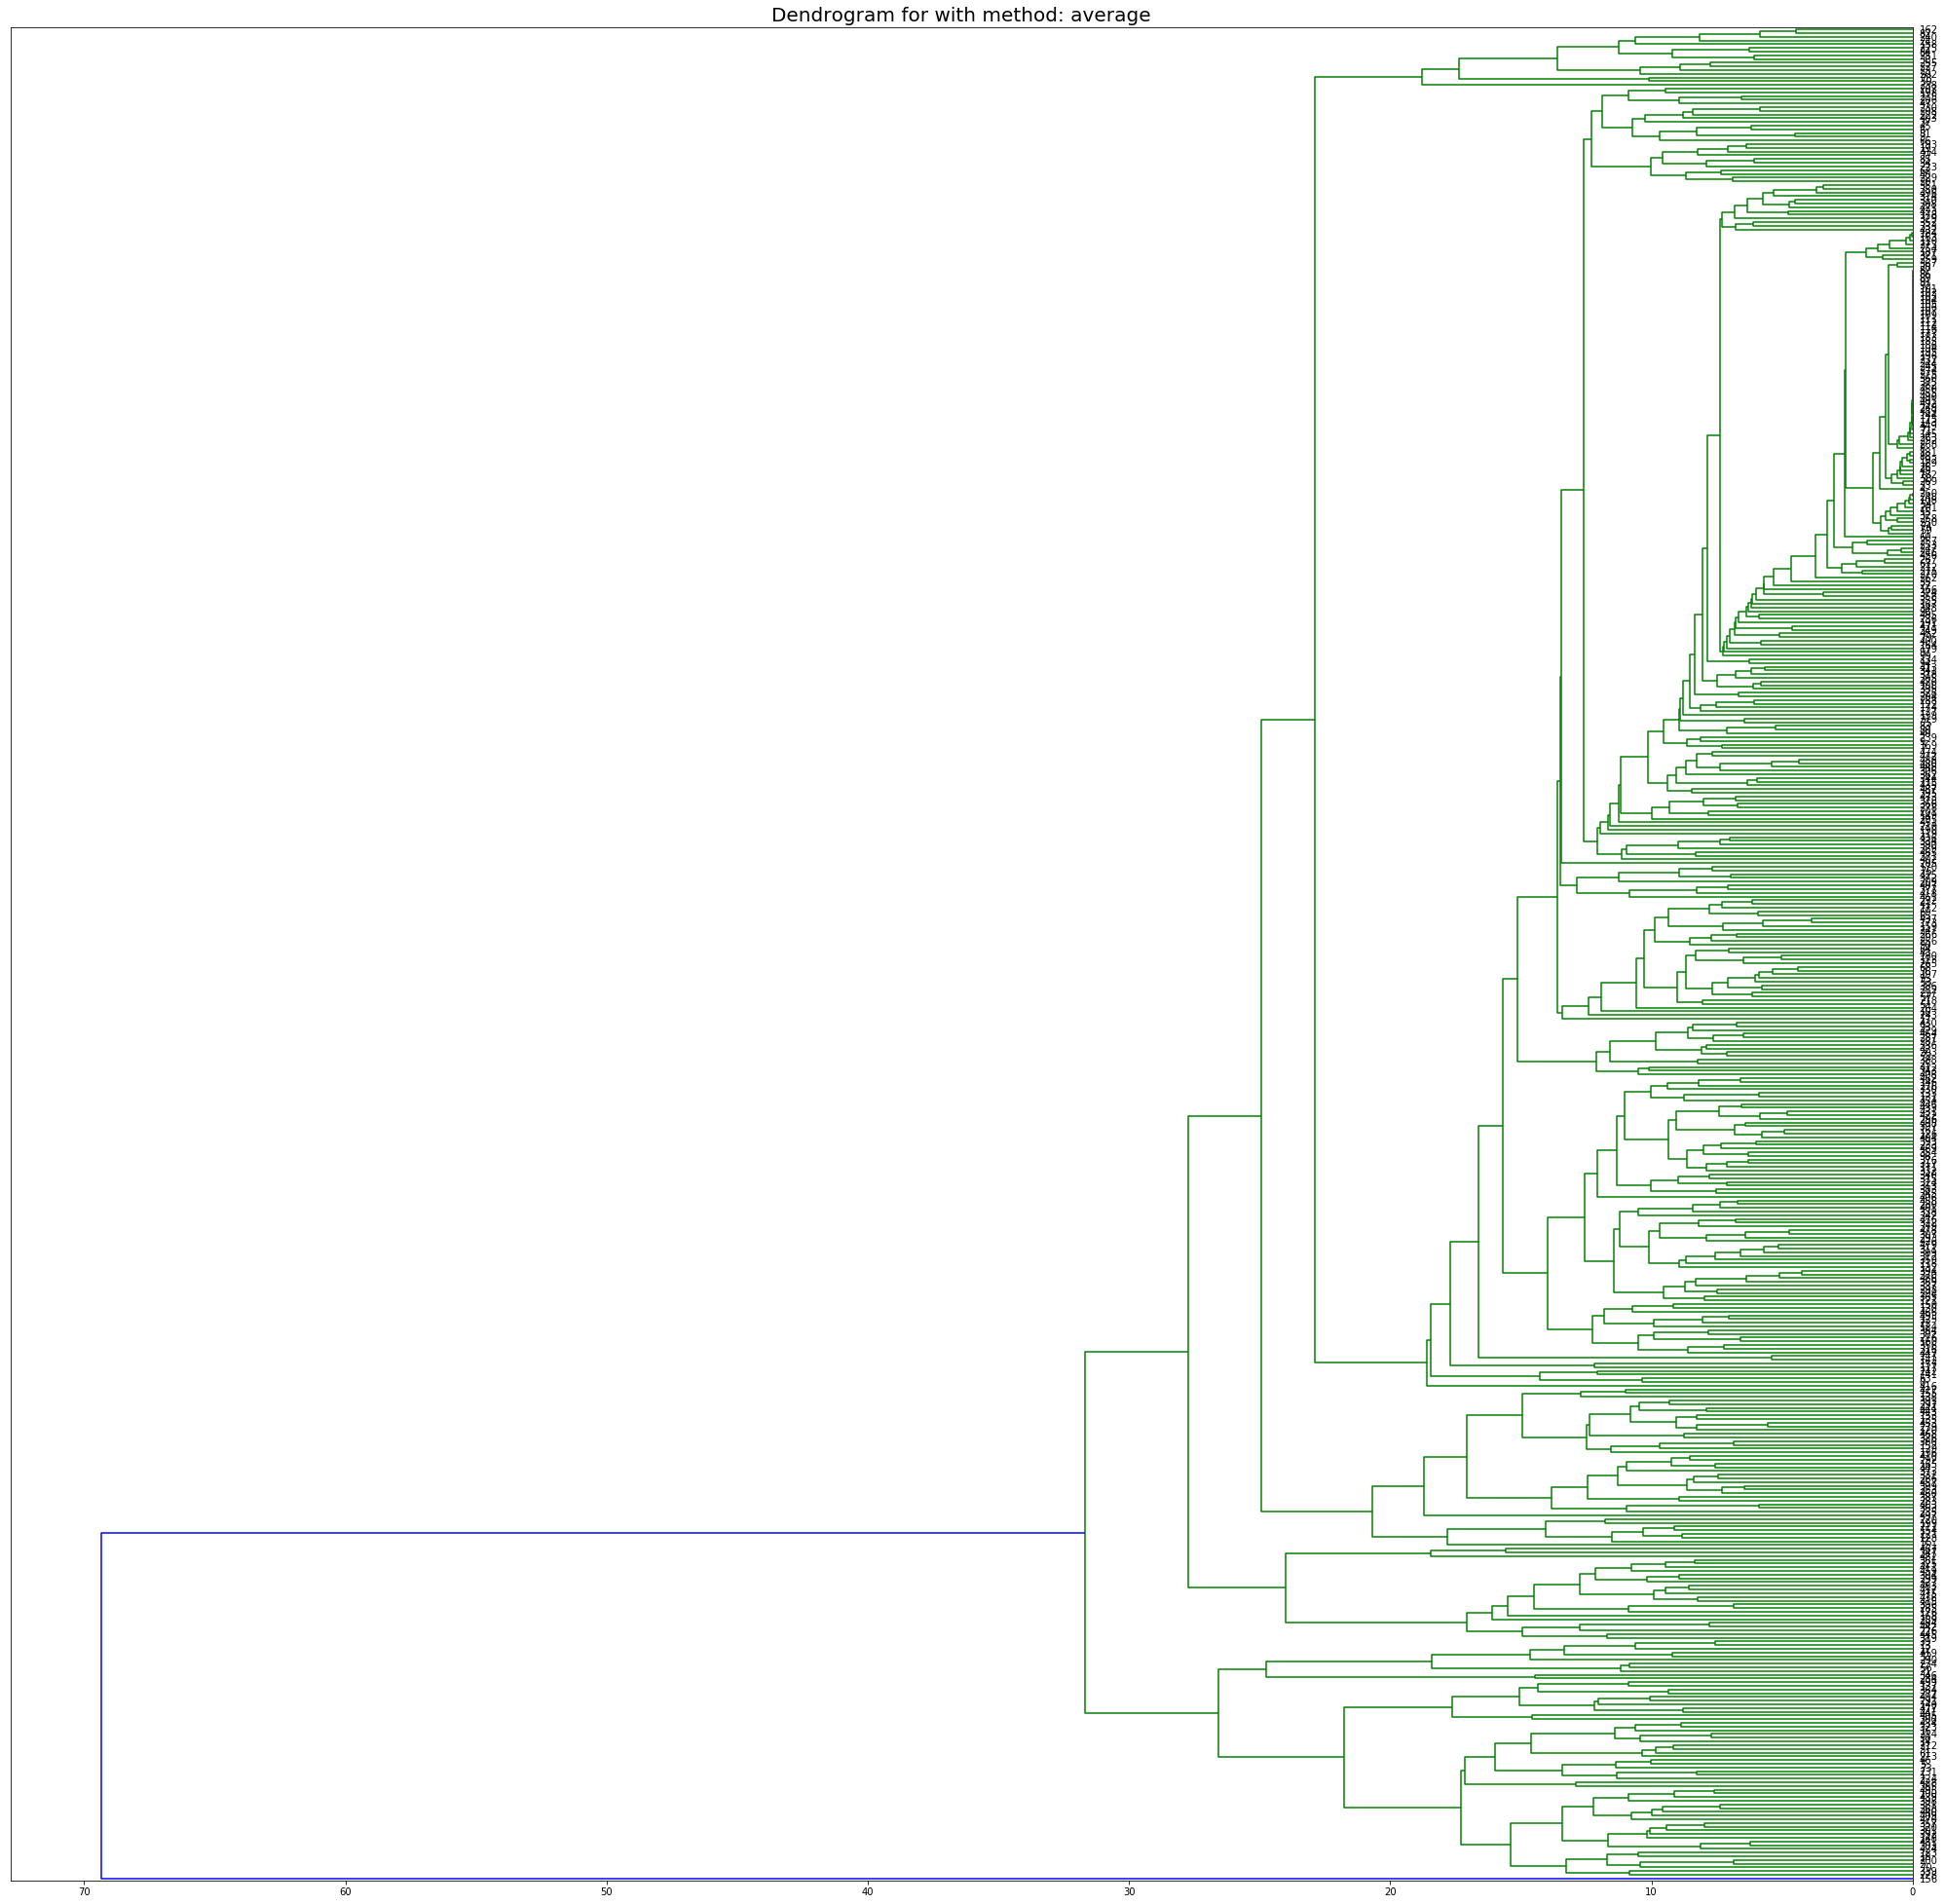

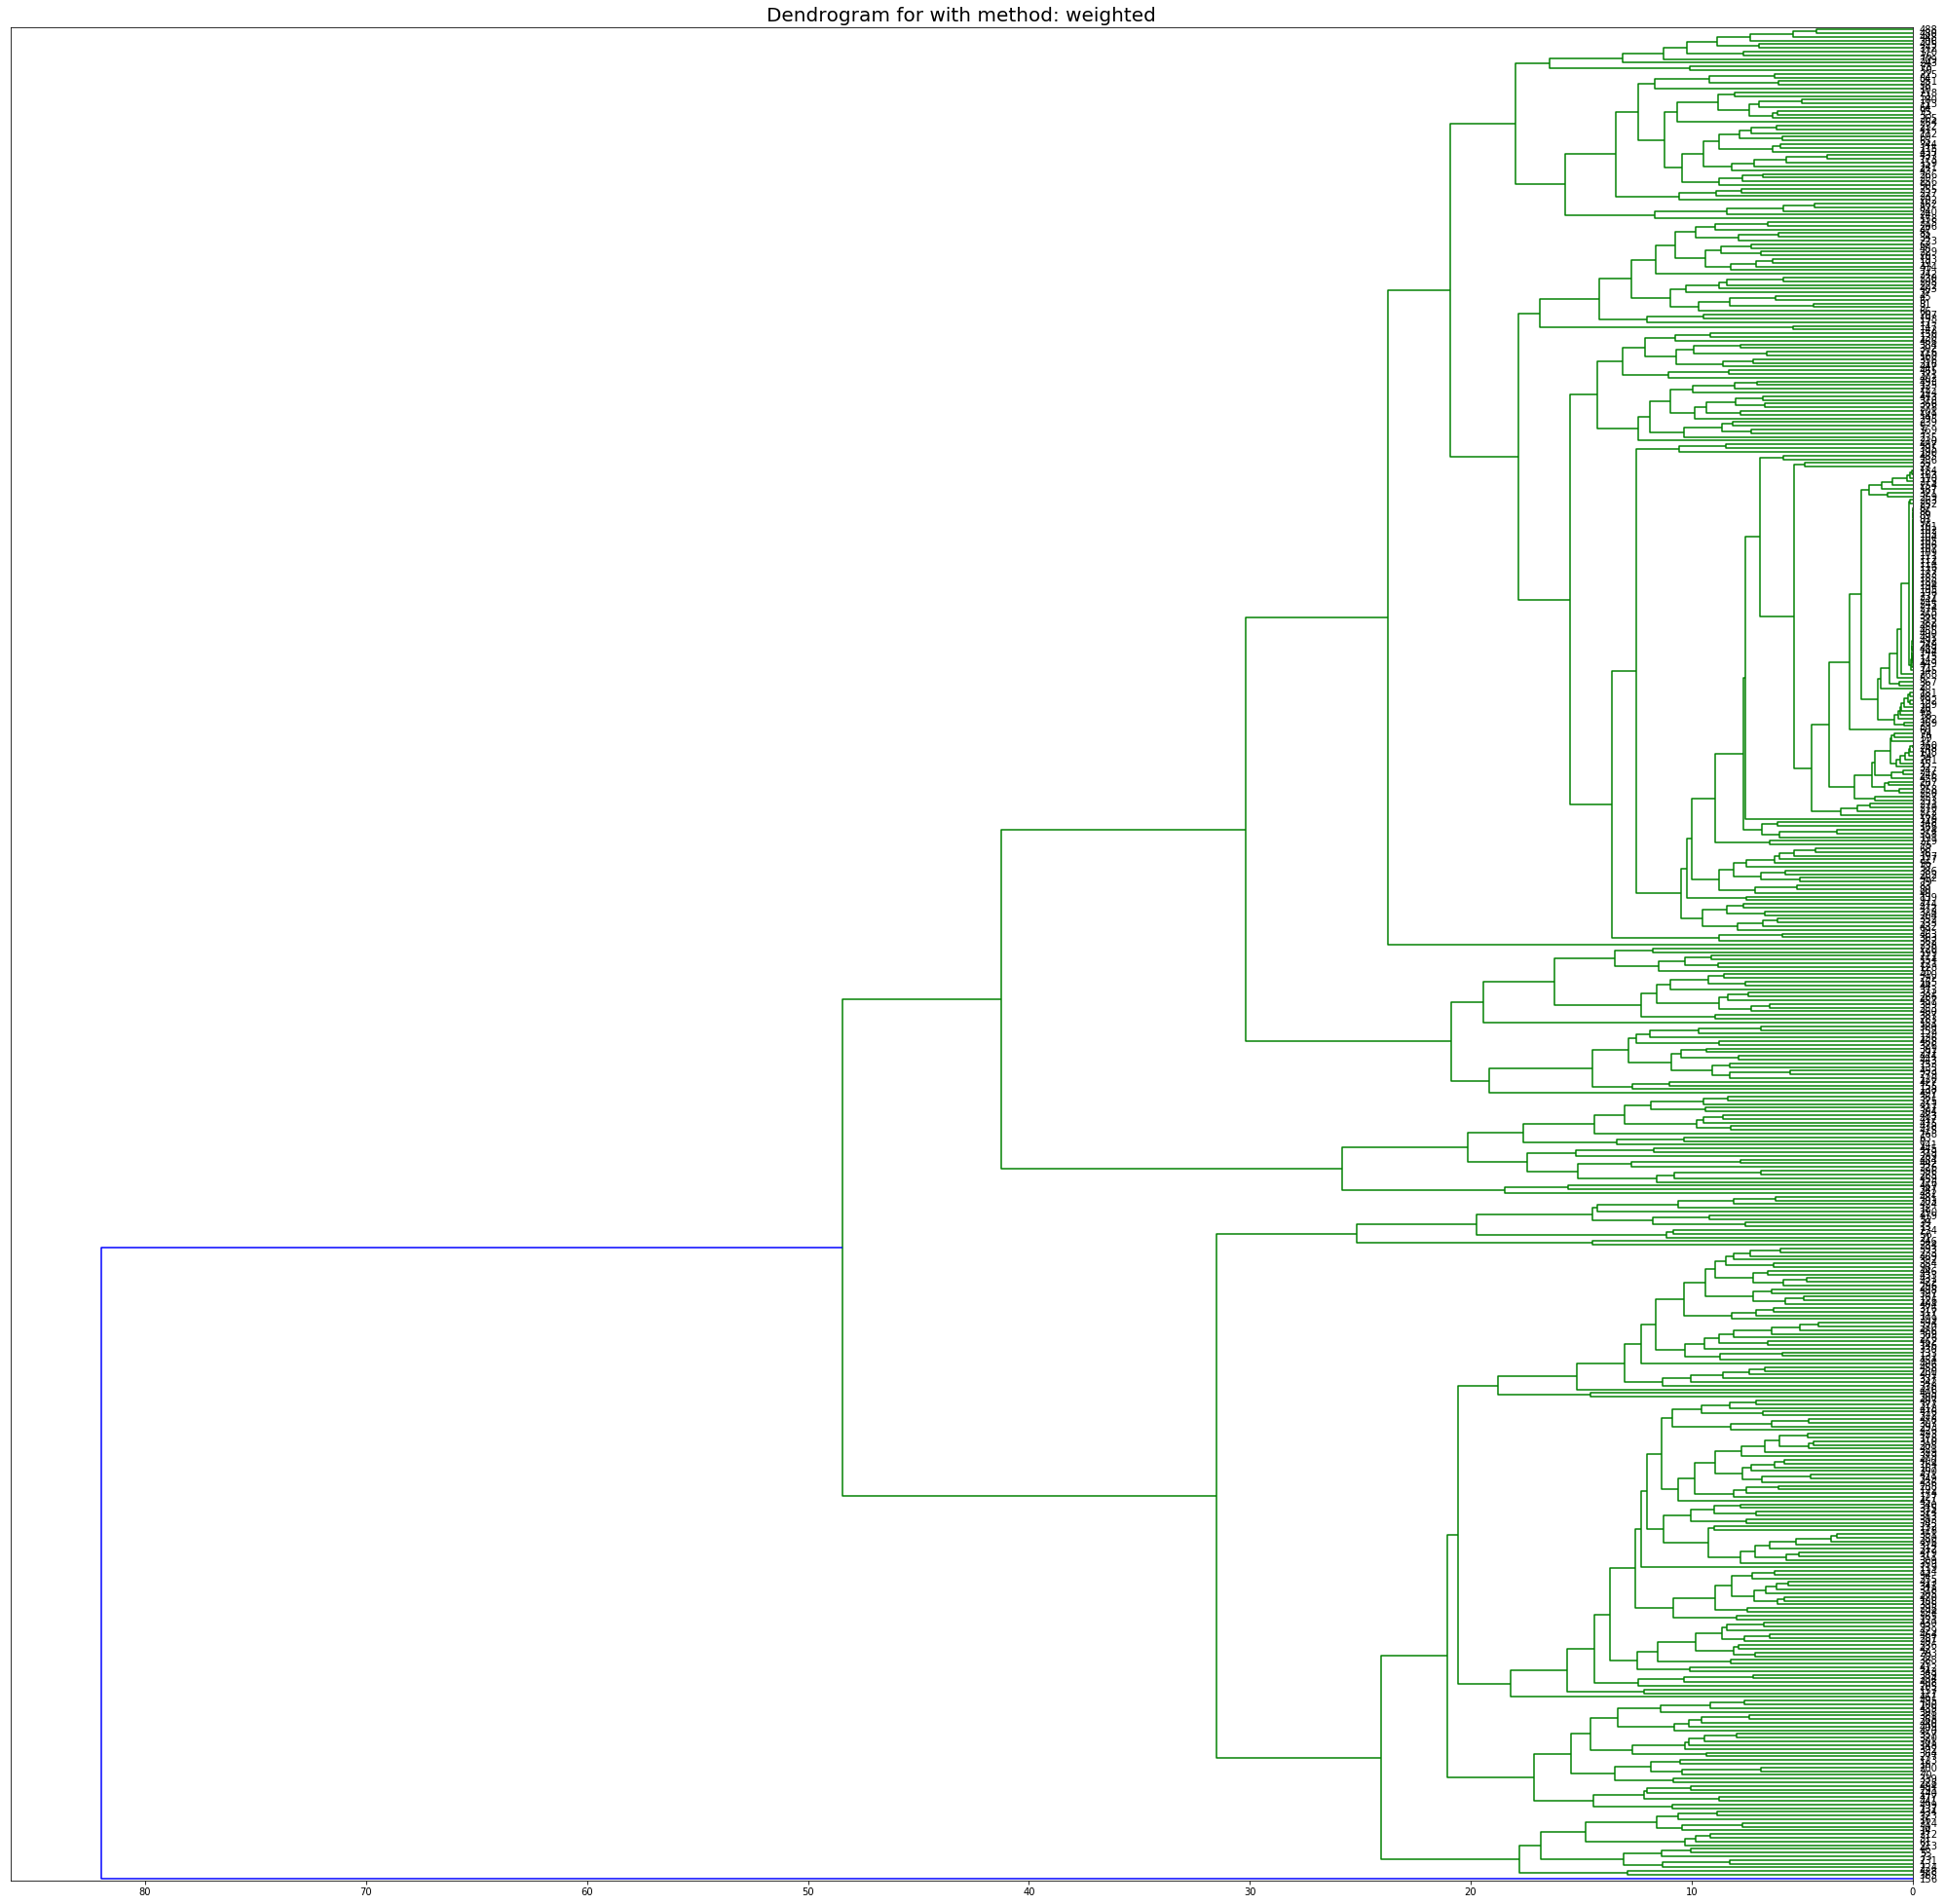

In [31]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
# data2 = StandardScaler().fit(subset_data)

import matplotlib.pyplot as plt
methods = ["average", "weighted"]
for idx, method in enumerate(methods):
    plt.figure(figsize=(35,35))


    mergings = linkage(subset_data[0:500], method=method)

    labels = fcluster(mergings, 120, criterion='distance')

    dendrogram(mergings, leaf_rotation=0, leaf_font_size=10,
               orientation="left"
              )#orientation="left"

    my_palette = plt.cm.get_cmap("Accent", 3)
    plt.title("Dendrogram for with method: {0}".format(method), fontsize=20)
    plt.show()

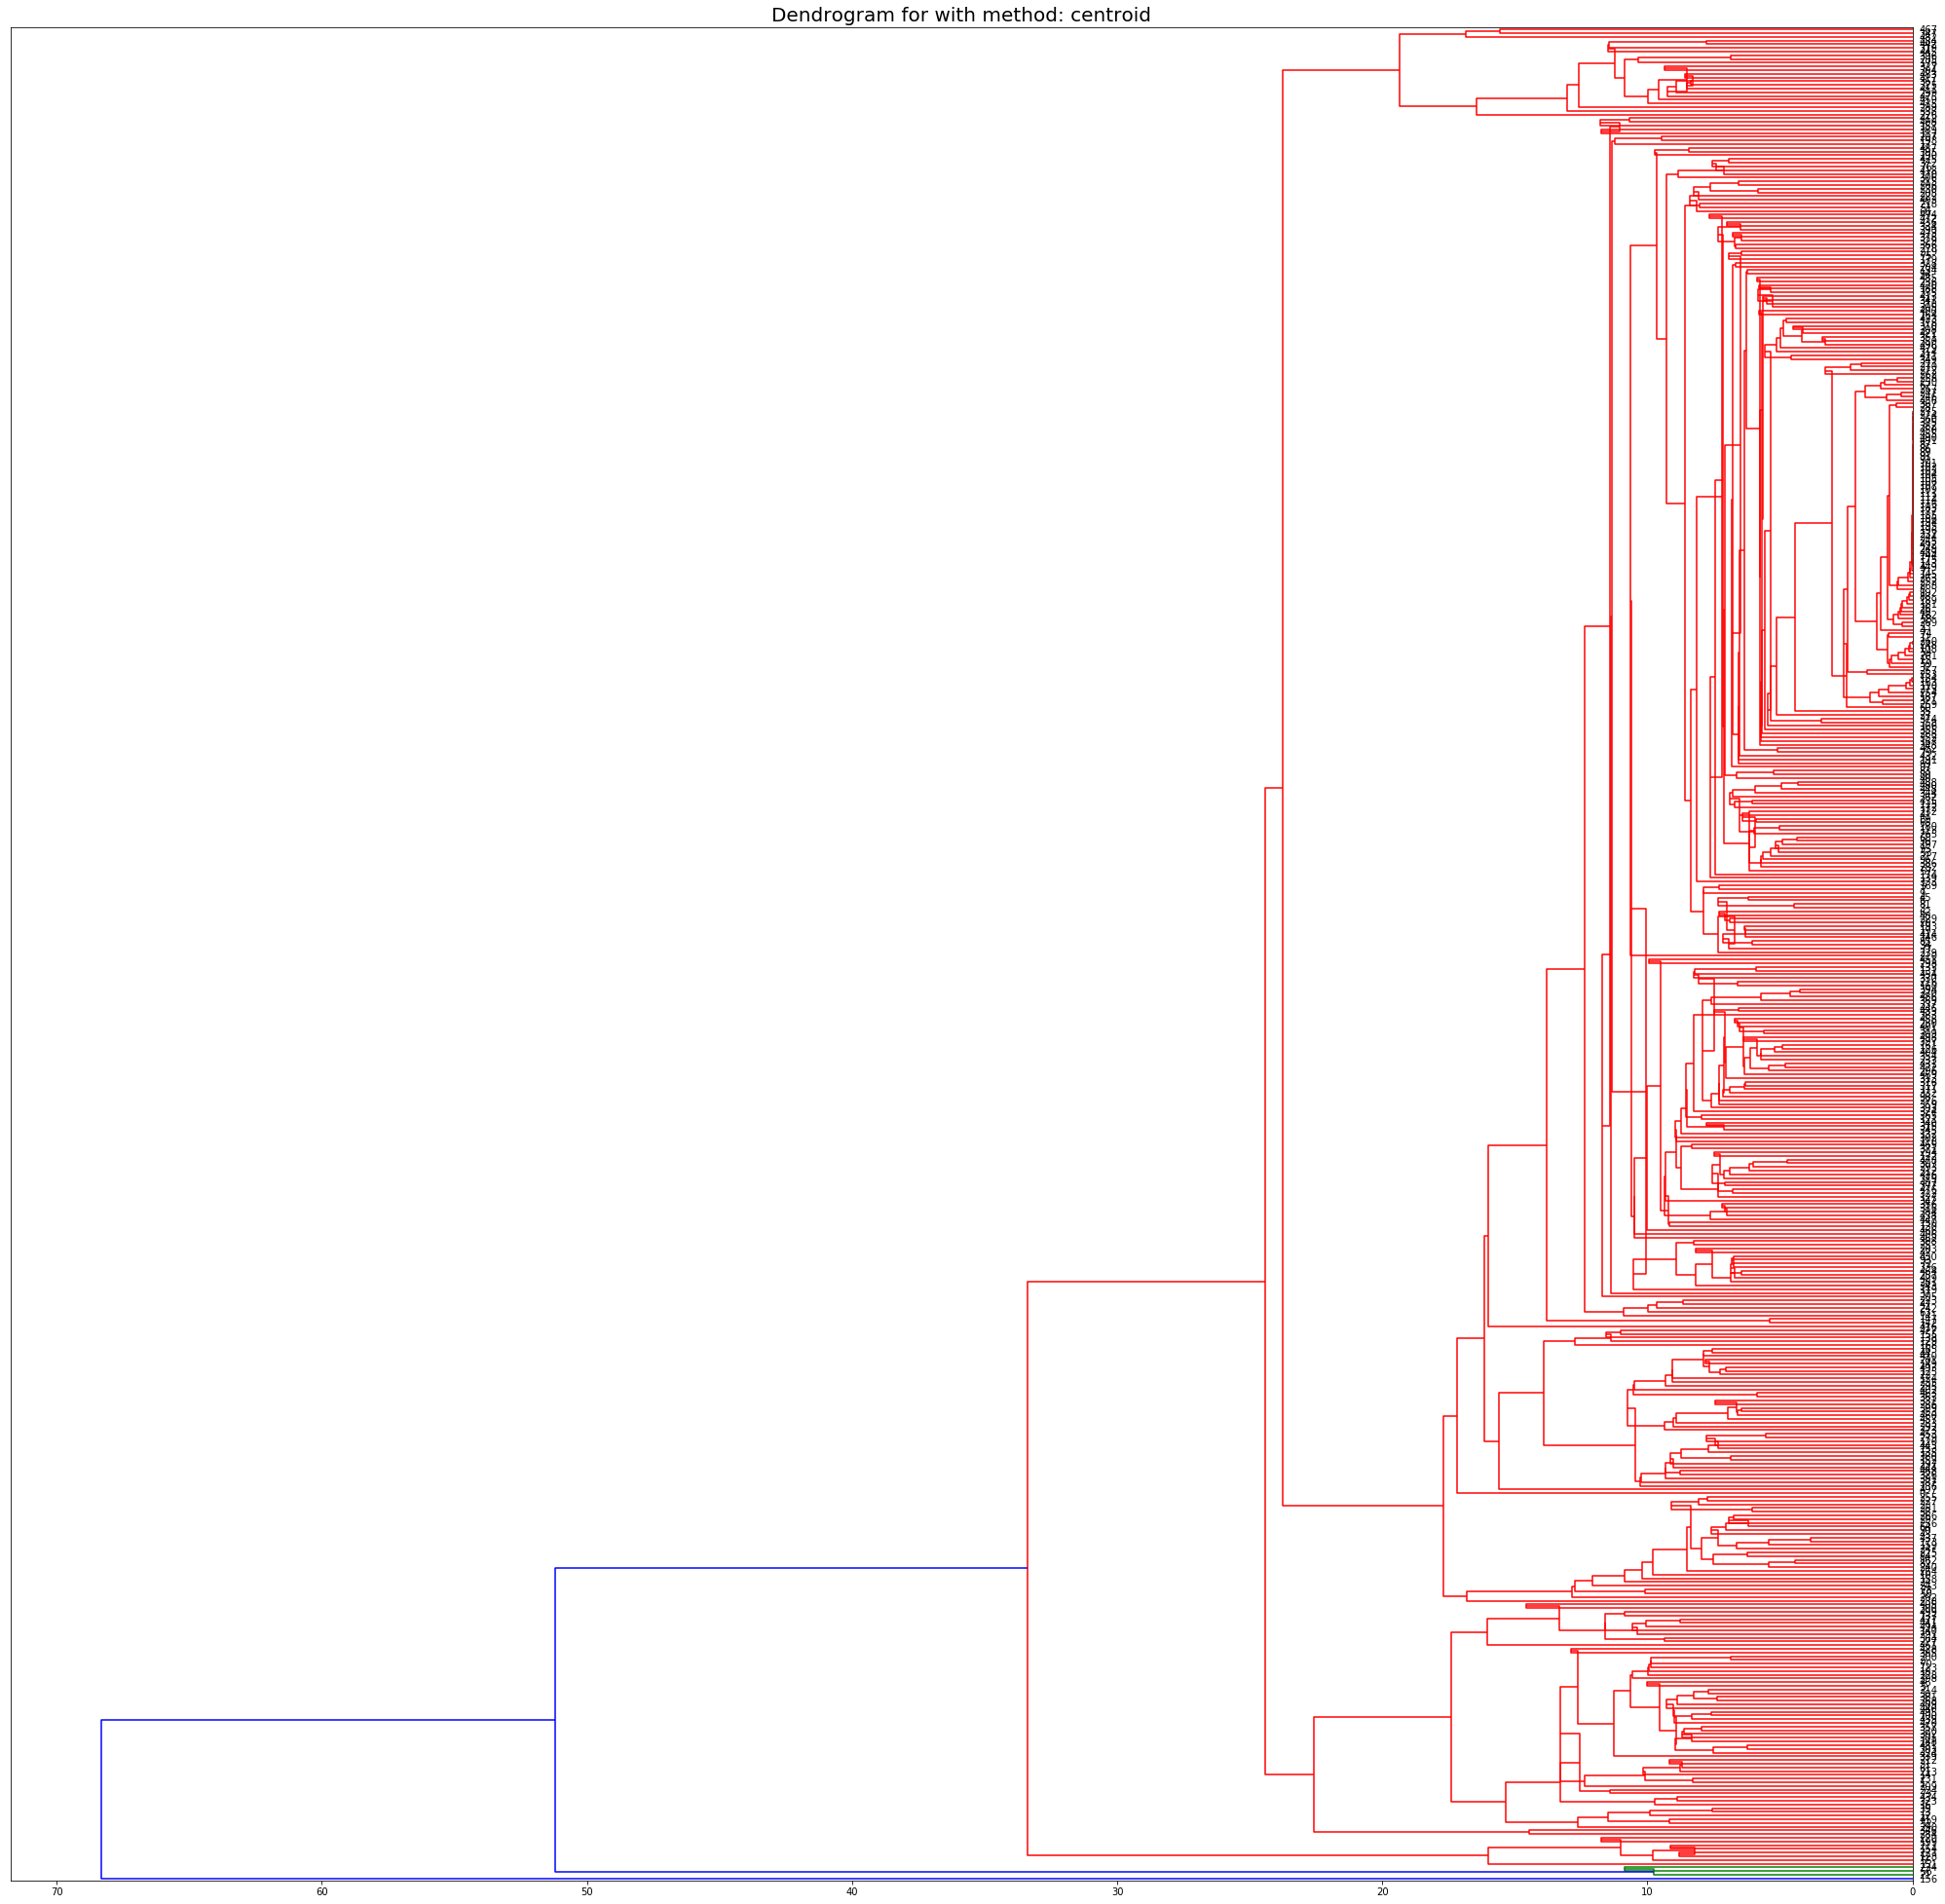

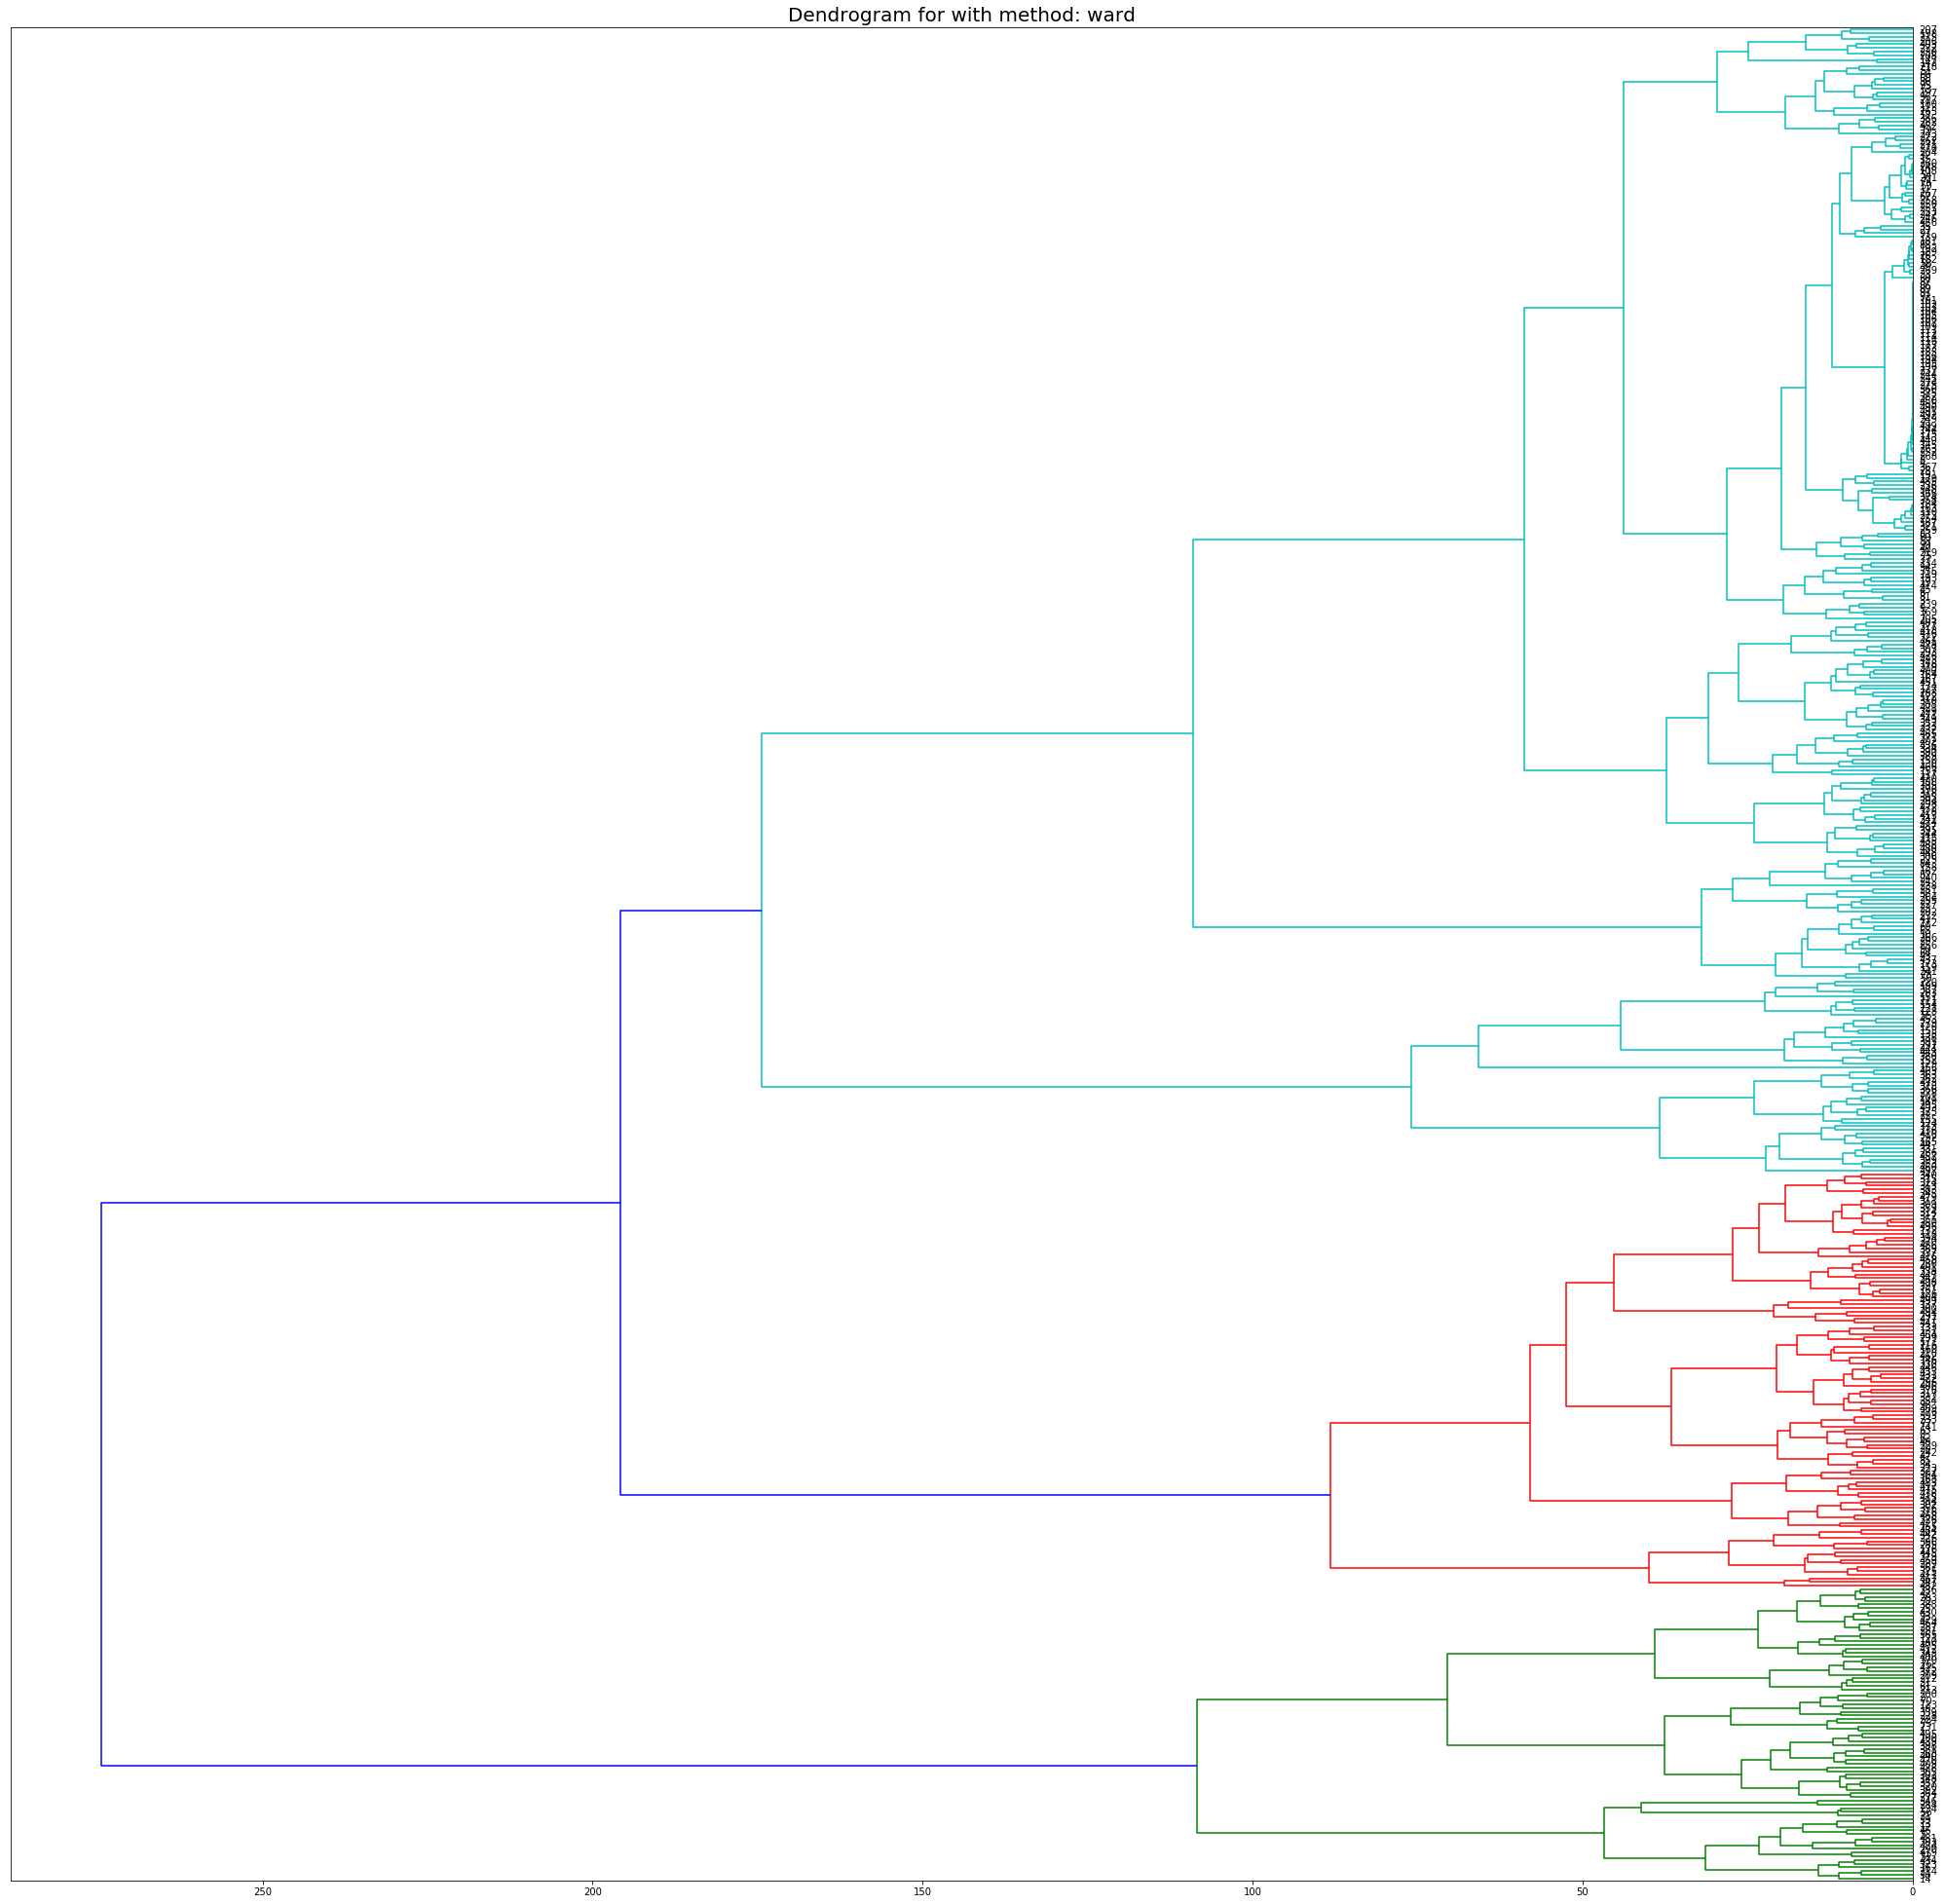

In [32]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
# data2 = StandardScaler().fit(subset_data)

import matplotlib.pyplot as plt
methods = ["centroid","ward"]
for idx, method in enumerate(methods):
    plt.figure(figsize=(35,35))


    mergings = linkage(subset_data[0:500], method=method)

    labels = fcluster(mergings, 120, criterion='distance')

    dendrogram(mergings, leaf_rotation=0, leaf_font_size=10,
               orientation="left"
              )#orientation="left"

    my_palette = plt.cm.get_cmap("Accent", 3)
    plt.title("Dendrogram for with method: {0}".format(method), fontsize=20)
    plt.show()

Collabrativ filter

In [15]:
survey.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,HCAHPS Measure ID,HCAHPS Question,...,HCAHPS Answer Percent,HCAHPS Answer Percent Footnote,HCAHPS Linear Mean Value,Number of Completed Surveys,Number of Completed Surveys Footnote,Survey Response Rate Percent,Survey Response Rate Percent Footnote,Measure Start Date,Measure End Date,Location
0,241335,ST ELIZABETH MEDICAL CENTER,1200 GRANT BLVD W,WABASHA,MN,55981,WABASHA,6515654531,H_COMP_5_LINEAR_SCORE,Communication about medicines - linear mean score,...,NaN,NaN,NaN,58.0,6 - Fewer than 100 patients completed the HCAH...,34.0,6 - Fewer than 100 patients completed the HCAH...,07/01/2017,06/30/2018,"1200 GRANT BLVD W WABASHA, MN 55981 (44.386416..."
1,241322,RAINY LAKE MEDICAL CENTER,1400 HIGHWAY 71,INTERNATIONAL FALLS,MN,56649,KOOCHICHING,2182834481,H_COMP_1_SN_P,"Patients who reported that their nurses ""Somet...",...,4.0,6 - Fewer than 100 patients completed the HCAH...,NaN,86.0,6 - Fewer than 100 patients completed the HCAH...,32.0,6 - Fewer than 100 patients completed the HCAH...,07/01/2017,06/30/2018,"1400 HIGHWAY 71 INTERNATIONAL FALLS, MN 56649 ..."
2,241317,NORTH SHORE HEALTH,515 5TH AVE WEST,GRAND MARAIS,MN,55604,COOK,2183873040,H_COMP_5_STAR_RATING,Communication about medicines - star rating,...,NaN,NaN,NaN,26.0,10 - Very few patients were eligible for the H...,46.0,10 - Very few patients were eligible for the H...,07/01/2017,06/30/2018,"515 5TH AVE WEST GRAND MARAIS, MN 55604 (47.75..."
3,241342,ORTONVILLE AREA HEALTH SERVICES,450 EASTVOLD AVE,ORTONVILLE,MN,56278,BIG STONE,3208392502,H_STAR_RATING,Summary star rating,...,NaN,NaN,NaN,81.0,6 - Fewer than 100 patients completed the HCAH...,36.0,6 - Fewer than 100 patients completed the HCAH...,07/01/2017,06/30/2018,"450 EASTVOLD AVE ORTONVILLE, MN 56278 (45.3147..."
4,241327,SLEEPY EYE MUNICIPAL HOSPITAL,400 FOURTH AVENUE NORTHWEST,SLEEPY EYE,MN,56085,BROWN,5077943571,H_COMP_5_SN_P,"Patients who reported that staff ""Sometimes"" o...",...,5.0,6 - Fewer than 100 patients completed the HCAH...,NaN,57.0,6 - Fewer than 100 patients completed the HCAH...,35.0,6 - Fewer than 100 patients completed the HCAH...,07/01/2017,06/30/2018,"400 FOURTH AVENUE NORTHWEST SLEEPY EYE, MN 560..."


In [31]:
survey_pivot = survey.pivot(index='Provider ID', columns='HCAHPS Measure ID',
                            values='HCAHPS Linear Mean Value')
survey_pivot.head()



HCAHPS Measure ID,H_CLEAN_HSP_A_P,H_CLEAN_HSP_SN_P,H_CLEAN_HSP_U_P,H_CLEAN_LINEAR_SCORE,H_CLEAN_STAR_RATING,H_COMP_1_A_P,H_COMP_1_LINEAR_SCORE,H_COMP_1_SN_P,H_COMP_1_STAR_RATING,H_COMP_1_U_P,...,H_QUIET_HSP_SN_P,H_QUIET_HSP_U_P,H_QUIET_LINEAR_SCORE,H_QUIET_STAR_RATING,H_RECMND_DN,H_RECMND_DY,H_RECMND_LINEAR_SCORE,H_RECMND_PY,H_RECMND_STAR_RATING,H_STAR_RATING
Provider ID,,,,,,,,,,,,,,,,,,,,,
010001,NaN,NaN,NaN,83.0,NaN,NaN,87.0,NaN,NaN,NaN,...,NaN,NaN,86.0,NaN,NaN,NaN,84.0,NaN,NaN,NaN
010005,NaN,NaN,NaN,87.0,NaN,NaN,91.0,NaN,NaN,NaN,...,NaN,NaN,85.0,NaN,NaN,NaN,88.0,NaN,NaN,NaN
010006,NaN,NaN,NaN,79.0,NaN,NaN,89.0,NaN,NaN,NaN,...,NaN,NaN,82.0,NaN,NaN,NaN,84.0,NaN,NaN,NaN
010007,NaN,NaN,NaN,86.0,NaN,NaN,89.0,NaN,NaN,NaN,...,NaN,NaN,86.0,NaN,NaN,NaN,85.0,NaN,NaN,NaN
010008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking the pivot the other way

In [110]:
survey_pivot_v2 = survey.pivot(index='HCAHPS Measure ID', columns='Provider ID',
                            values='HCAHPS Linear Mean Value')
survey_pivot_v2.head()



Provider ID,010001,010005,010006,010007,010008,010011,010012,010016,010018,010019,...,670113,670115,670116,670117,670118,670119,670120,670121,670122,670124
HCAHPS Measure ID,,,,,,,,,,,,,,,,,,,,,
H_CLEAN_HSP_A_P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_CLEAN_HSP_SN_P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_CLEAN_HSP_U_P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H_CLEAN_LINEAR_SCORE,83.0,87.0,79.0,86.0,NaN,84.0,86.0,84.0,NaN,82.0,...,NaN,NaN,92.0,NaN,NaN,NaN,89.0,NaN,88.0,NaN
H_CLEAN_STAR_RATING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
outcomes.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Measure Name,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,241304,SANFORD MEDICAL CENTER WHEATON,401 12TH STREET NORTH,WHEATON,MN,56296,TRAVERSE,3205638226,Rate of complications for hip/knee replacement...,COMP_HIP_KNEE,Not Available,Not Available,Not Available,Not Available,Not Available,5 - Results are not available for this reporti...,04/01/2014,03/31/2017,"401 12TH STREET NORTH WHEATON, MN 56296 (45.80..."
1,240080,"UNIVERSITY OF MINNESOTA MEDICAL CENTER, FAIRVIEW",2450 RIVERSIDE AVENUE,MINNEAPOLIS,MN,55454,HENNEPIN,6122733000,Pressure sores,PSI_3_ULCER,No Different than the National Rate,5964,0.12,0,0.49,NaN,10/01/2015,06/30/2017,"2450 RIVERSIDE AVENUE MINNEAPOLIS, MN 55454 (4..."
2,240076,BUFFALO HOSPITAL,303 CATLIN ST,BUFFALO,MN,55313,WRIGHT,7636841212,Death rate for stroke patients,MORT_30_STK,Number of Cases Too Small,Not Available,Not Available,Not Available,Not Available,1 - The number of cases/patients is too few to...,07/01/2014,06/30/2017,"303 CATLIN ST BUFFALO, MN 55313 (45.1932, -93...."
3,240196,PHILLIPS EYE INSTITUTE,2215 PARK AVENUE SOUTH,MINNEAPOLIS,MN,55404,HENNEPIN,6127758751,Postoperative Acute Kidney Injury Requiring Di...,PSI_10_POST_KIDNEY,Number of Cases Too Small,Not Available,Not Available,Not Available,Not Available,1 - The number of cases/patients is too few to...,10/01/2015,06/30/2017,"2215 PARK AVENUE SOUTH MINNEAPOLIS, MN 55404 (..."
4,240084,ESSENTIA HEALTH VIRGINIA,901 9TH STREET NORTH,VIRGINIA,MN,55792,ST. LOUIS,2187413340,Pressure sores,PSI_3_ULCER,No Different than the National Rate,359,0.32,0,1.35,NaN,10/01/2015,06/30/2017,"901 9TH STREET NORTH VIRGINIA, MN 55792 (47.53..."


In [20]:
merged = pd.merge(survey_pivot, outcomes, on='Provider ID')


In [21]:
merged.head()

,Provider ID,H_CLEAN_HSP_A_P,H_CLEAN_HSP_SN_P,H_CLEAN_HSP_U_P,H_CLEAN_LINEAR_SCORE,H_CLEAN_STAR_RATING,H_COMP_1_A_P,H_COMP_1_LINEAR_SCORE,H_COMP_1_SN_P,H_COMP_1_STAR_RATING,...,Measure ID,Compared to National,Denominator,Score,Lower Estimate,Higher Estimate,Footnote,Measure Start Date,Measure End Date,Location
0,010001,NaN,NaN,NaN,83.0,NaN,NaN,87.0,NaN,NaN,...,MORT_30_STK,No Different than the National Rate,604,13.7,11.5,16.5,NaN,07/01/2014,06/30/2017,"1108 ROSS CLARK CIRCLE DOTHAN, AL 36301 (31.21..."
1,010001,NaN,NaN,NaN,83.0,NaN,NaN,87.0,NaN,NaN,...,MORT_30_PN,No Different than the National Rate,553,16.2,13.7,19.2,NaN,07/01/2014,06/30/2017,"1108 ROSS CLARK CIRCLE DOTHAN, AL 36301 (31.21..."
2,010001,NaN,NaN,NaN,83.0,NaN,NaN,87.0,NaN,NaN,...,MORT_30_CABG,No Different than the National Rate,302,4.5,2.9,7.0,NaN,07/01/2014,06/30/2017,"1108 ROSS CLARK CIRCLE DOTHAN, AL 36301 (31.21..."
3,010001,NaN,NaN,NaN,83.0,NaN,NaN,87.0,NaN,NaN,...,PSI_6_IAT_PTX,No Different than the National Rate,14020,0.38,0.2,0.56,NaN,10/01/2015,06/30/2017,"1108 ROSS CLARK CIRCLE DOTHAN, AL 36301 (31.21..."
4,010001,NaN,NaN,NaN,83.0,NaN,NaN,87.0,NaN,NaN,...,PSI_90_SAFETY,No Different than the National Value,Not Available,0.90,0.68,1.12,NaN,10/01/2015,06/30/2017,"1108 ROSS CLARK CIRCLE DOTHAN, AL 36301 (31.21..."


In [29]:
merged['Provider ID'].value_counts().sort_values(ascending=False).head(10)


110132    19
450211    19
440053    19
330125    19
450085    19
041300    19
360017    19
340041    19
530008    19
140089    19
Name: Provider ID, dtype: int64

In [30]:
survey_pivot.to_csv("survey_pivot.csv")

In [111]:
data = survey_pivot.applymap(lambda x : 1 if x>85 else 0).values

data2 = survey_pivot_v2.applymap(lambda x : 1 if x>85 else 0).values

In [112]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [113]:
data2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [114]:
# Define the Cosine Similarity function

def cosine_similarity(u, v):
    return(np.dot(u, v)/np.sqrt((np.dot(u, u) * np.dot(v, v))))

In [115]:
data.shape

(4909, 51)

In [116]:
data2.shape

(50, 4909)

In [48]:
x[1:].shape

(4908, 50)

In [117]:
x = data
xx = data2

In [118]:
y = data[0]

yy = data2[0]

In [49]:
import numpy as np
similarity = np.apply_along_axis(cosine_similarity, 1, x[1:], y )

/Users/venku/anaconda3/envs/data_mining/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [50]:
similarity

array([0.47140452, 0.81649658, 0.8660254 , ...,        nan, 0.61237244,
              nan])

In [43]:
maximum = np.nanmax(similarity)

In [44]:
maximum

1.0

In [51]:
# Here we got the similarity of the row this first row matches.
usr_idx = np.where(similarity==maximum)[0][0]

In [59]:
usr_idx

33

In [82]:
x[1:][usr_idx]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0])

In [84]:
x[usr_idx]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [89]:
y.shape
x[usr_idx].shape

(50,)

In [119]:
surv_vec = y - x[usr_idx+1]

In [120]:
surv_vec

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [121]:
surv_vec.shape

(51,)

In [122]:
# We want a mask aray, so we zero out any recommended movie.
# (any negative value is a movie to recommend)
surv_vec[surv_vec >= 0] = 1
surv_vec[surv_vec < 0] = 0

In [123]:
surv_vec

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

In [124]:
i, = np.where(x[1:][33] == 1)

In [125]:
i

array([ 6, 11, 42])

In [66]:
survey_pivot['tmp_idx'] = np.array(range(x.shape[0]))

In [67]:
surv_col_name  = survey_pivot[survey_pivot.tmp_idx == usr_idx].columns

In [68]:
surv_col_name

Index(['H_CLEAN_HSP_A_P', 'H_CLEAN_HSP_SN_P', 'H_CLEAN_HSP_U_P',
       'H_CLEAN_LINEAR_SCORE', 'H_CLEAN_STAR_RATING', 'H_COMP_1_A_P',
       'H_COMP_1_LINEAR_SCORE', 'H_COMP_1_SN_P', 'H_COMP_1_STAR_RATING',
       'H_COMP_1_U_P', 'H_COMP_2_A_P', 'H_COMP_2_LINEAR_SCORE',
       'H_COMP_2_SN_P', 'H_COMP_2_STAR_RATING', 'H_COMP_2_U_P', 'H_COMP_3_A_P',
       'H_COMP_3_LINEAR_SCORE', 'H_COMP_3_SN_P', 'H_COMP_3_STAR_RATING',
       'H_COMP_3_U_P', 'H_COMP_5_A_P', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_5_SN_P', 'H_COMP_5_STAR_RATING', 'H_COMP_5_U_P',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_6_N_P', 'H_COMP_6_STAR_RATING',
       'H_COMP_6_Y_P', 'H_COMP_7_A', 'H_COMP_7_D_SD', 'H_COMP_7_LINEAR_SCORE',
       'H_COMP_7_SA', 'H_COMP_7_STAR_RATING', 'H_HSP_RATING_0_6',
       'H_HSP_RATING_7_8', 'H_HSP_RATING_9_10', 'H_HSP_RATING_LINEAR_SCORE',
       'H_HSP_RATING_STAR_RATING', 'H_QUIET_HSP_A_P', 'H_QUIET_HSP_SN_P',
       'H_QUIET_HSP_U_P', 'H_QUIET_LINEAR_SCORE', 'H_QUIET_STAR_RATING',
      

In [71]:
import numpy.ma as ma

In [103]:
surv_vec.shape

(50,)

In [100]:
surv_col_name[:-1].shape

(50,)

In [101]:
surv_col_name[:-1]

Index(['H_CLEAN_HSP_A_P', 'H_CLEAN_HSP_SN_P', 'H_CLEAN_HSP_U_P',
       'H_CLEAN_LINEAR_SCORE', 'H_CLEAN_STAR_RATING', 'H_COMP_1_A_P',
       'H_COMP_1_LINEAR_SCORE', 'H_COMP_1_SN_P', 'H_COMP_1_STAR_RATING',
       'H_COMP_1_U_P', 'H_COMP_2_A_P', 'H_COMP_2_LINEAR_SCORE',
       'H_COMP_2_SN_P', 'H_COMP_2_STAR_RATING', 'H_COMP_2_U_P', 'H_COMP_3_A_P',
       'H_COMP_3_LINEAR_SCORE', 'H_COMP_3_SN_P', 'H_COMP_3_STAR_RATING',
       'H_COMP_3_U_P', 'H_COMP_5_A_P', 'H_COMP_5_LINEAR_SCORE',
       'H_COMP_5_SN_P', 'H_COMP_5_STAR_RATING', 'H_COMP_5_U_P',
       'H_COMP_6_LINEAR_SCORE', 'H_COMP_6_N_P', 'H_COMP_6_STAR_RATING',
       'H_COMP_6_Y_P', 'H_COMP_7_A', 'H_COMP_7_D_SD', 'H_COMP_7_LINEAR_SCORE',
       'H_COMP_7_SA', 'H_COMP_7_STAR_RATING', 'H_HSP_RATING_0_6',
       'H_HSP_RATING_7_8', 'H_HSP_RATING_9_10', 'H_HSP_RATING_LINEAR_SCORE',
       'H_HSP_RATING_STAR_RATING', 'H_QUIET_HSP_A_P', 'H_QUIET_HSP_SN_P',
       'H_QUIET_HSP_U_P', 'H_QUIET_LINEAR_SCORE', 'H_QUIET_STAR_RATING',
      

In [104]:
ma_surv_idx = ma.array(surv_col_name[:-1], mask=surv_vec)

In [105]:
ma_surv_idx

masked_array(data=['H_CLEAN_HSP_A_P', 'H_CLEAN_HSP_SN_P',
                   'H_CLEAN_HSP_U_P', 'H_CLEAN_LINEAR_SCORE',
                   'H_CLEAN_STAR_RATING', 'H_COMP_1_A_P', --,
                   'H_COMP_1_SN_P', 'H_COMP_1_STAR_RATING',
                   'H_COMP_1_U_P', 'H_COMP_2_A_P', --, 'H_COMP_2_SN_P',
                   'H_COMP_2_STAR_RATING', 'H_COMP_2_U_P', 'H_COMP_3_A_P',
                   'H_COMP_3_LINEAR_SCORE', 'H_COMP_3_SN_P',
                   'H_COMP_3_STAR_RATING', 'H_COMP_3_U_P', 'H_COMP_5_A_P',
                   'H_COMP_5_LINEAR_SCORE', 'H_COMP_5_SN_P',
                   'H_COMP_5_STAR_RATING', 'H_COMP_5_U_P',
                   'H_COMP_6_LINEAR_SCORE', 'H_COMP_6_N_P',
                   'H_COMP_6_STAR_RATING', 'H_COMP_6_Y_P', 'H_COMP_7_A',
                   'H_COMP_7_D_SD', 'H_COMP_7_LINEAR_SCORE',
                   'H_COMP_7_SA', 'H_COMP_7_STAR_RATING',
                   'H_HSP_RATING_0_6', 'H_HSP_RATING_7_8',
                   'H_HSP_RATING_9_10', 'H_H

In [107]:
surv_idx_col_name = ma_surv_idx[~ma_surv_idx.mask]

In [108]:
surv_idx_col_name

masked_array(data=['H_CLEAN_HSP_A_P', 'H_CLEAN_HSP_SN_P',
                   'H_CLEAN_HSP_U_P', 'H_CLEAN_LINEAR_SCORE',
                   'H_CLEAN_STAR_RATING', 'H_COMP_1_A_P', 'H_COMP_1_SN_P',
                   'H_COMP_1_STAR_RATING', 'H_COMP_1_U_P', 'H_COMP_2_A_P',
                   'H_COMP_2_SN_P', 'H_COMP_2_STAR_RATING',
                   'H_COMP_2_U_P', 'H_COMP_3_A_P',
                   'H_COMP_3_LINEAR_SCORE', 'H_COMP_3_SN_P',
                   'H_COMP_3_STAR_RATING', 'H_COMP_3_U_P', 'H_COMP_5_A_P',
                   'H_COMP_5_LINEAR_SCORE', 'H_COMP_5_SN_P',
                   'H_COMP_5_STAR_RATING', 'H_COMP_5_U_P',
                   'H_COMP_6_LINEAR_SCORE', 'H_COMP_6_N_P',
                   'H_COMP_6_STAR_RATING', 'H_COMP_6_Y_P', 'H_COMP_7_A',
                   'H_COMP_7_D_SD', 'H_COMP_7_LINEAR_SCORE',
                   'H_COMP_7_SA', 'H_COMP_7_STAR_RATING',
                   'H_HSP_RATING_0_6', 'H_HSP_RATING_7_8',
                   'H_HSP_RATING_9_10', 'H_HSP_RATIN

In [130]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [132]:
data[0]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [133]:
data[33+1]

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0])

In [134]:
survey_pivot.iloc[0]

HCAHPS Measure ID
H_CLEAN_HSP_A_P               NaN
H_CLEAN_HSP_SN_P              NaN
H_CLEAN_HSP_U_P               NaN
H_CLEAN_LINEAR_SCORE         83.0
H_CLEAN_STAR_RATING           NaN
H_COMP_1_A_P                  NaN
H_COMP_1_LINEAR_SCORE        87.0
H_COMP_1_SN_P                 NaN
H_COMP_1_STAR_RATING          NaN
H_COMP_1_U_P                  NaN
H_COMP_2_A_P                  NaN
H_COMP_2_LINEAR_SCORE        90.0
H_COMP_2_SN_P                 NaN
H_COMP_2_STAR_RATING          NaN
H_COMP_2_U_P                  NaN
H_COMP_3_A_P                  NaN
H_COMP_3_LINEAR_SCORE        75.0
H_COMP_3_SN_P                 NaN
H_COMP_3_STAR_RATING          NaN
H_COMP_3_U_P                  NaN
H_COMP_5_A_P                  NaN
H_COMP_5_LINEAR_SCORE        70.0
H_COMP_5_SN_P                 NaN
H_COMP_5_STAR_RATING          NaN
H_COMP_5_U_P                  NaN
H_COMP_6_LINEAR_SCORE        85.0
H_COMP_6_N_P                  NaN
H_COMP_6_STAR_RATING          NaN
H_COMP_6_Y_P                  

In [135]:
survey_pivot.iloc[33+1]

HCAHPS Measure ID
H_CLEAN_HSP_A_P               NaN
H_CLEAN_HSP_SN_P              NaN
H_CLEAN_HSP_U_P               NaN
H_CLEAN_LINEAR_SCORE         83.0
H_CLEAN_STAR_RATING           NaN
H_COMP_1_A_P                  NaN
H_COMP_1_LINEAR_SCORE        90.0
H_COMP_1_SN_P                 NaN
H_COMP_1_STAR_RATING          NaN
H_COMP_1_U_P                  NaN
H_COMP_2_A_P                  NaN
H_COMP_2_LINEAR_SCORE        90.0
H_COMP_2_SN_P                 NaN
H_COMP_2_STAR_RATING          NaN
H_COMP_2_U_P                  NaN
H_COMP_3_A_P                  NaN
H_COMP_3_LINEAR_SCORE        85.0
H_COMP_3_SN_P                 NaN
H_COMP_3_STAR_RATING          NaN
H_COMP_3_U_P                  NaN
H_COMP_5_A_P                  NaN
H_COMP_5_LINEAR_SCORE        78.0
H_COMP_5_SN_P                 NaN
H_COMP_5_STAR_RATING          NaN
H_COMP_5_U_P                  NaN
H_COMP_6_LINEAR_SCORE        84.0
H_COMP_6_N_P                  NaN
H_COMP_6_STAR_RATING          NaN
H_COMP_6_Y_P                  

# Paris Grid

In [228]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [229]:
data=pd.read_csv('hospitalData.csv')

In [230]:
datafill = data.fillna(data.mean())

In [231]:
y=datafill.iloc[:,2:21]
x=datafill.iloc[:,22:31]

<Figure size 1080x1296 with 0 Axes>

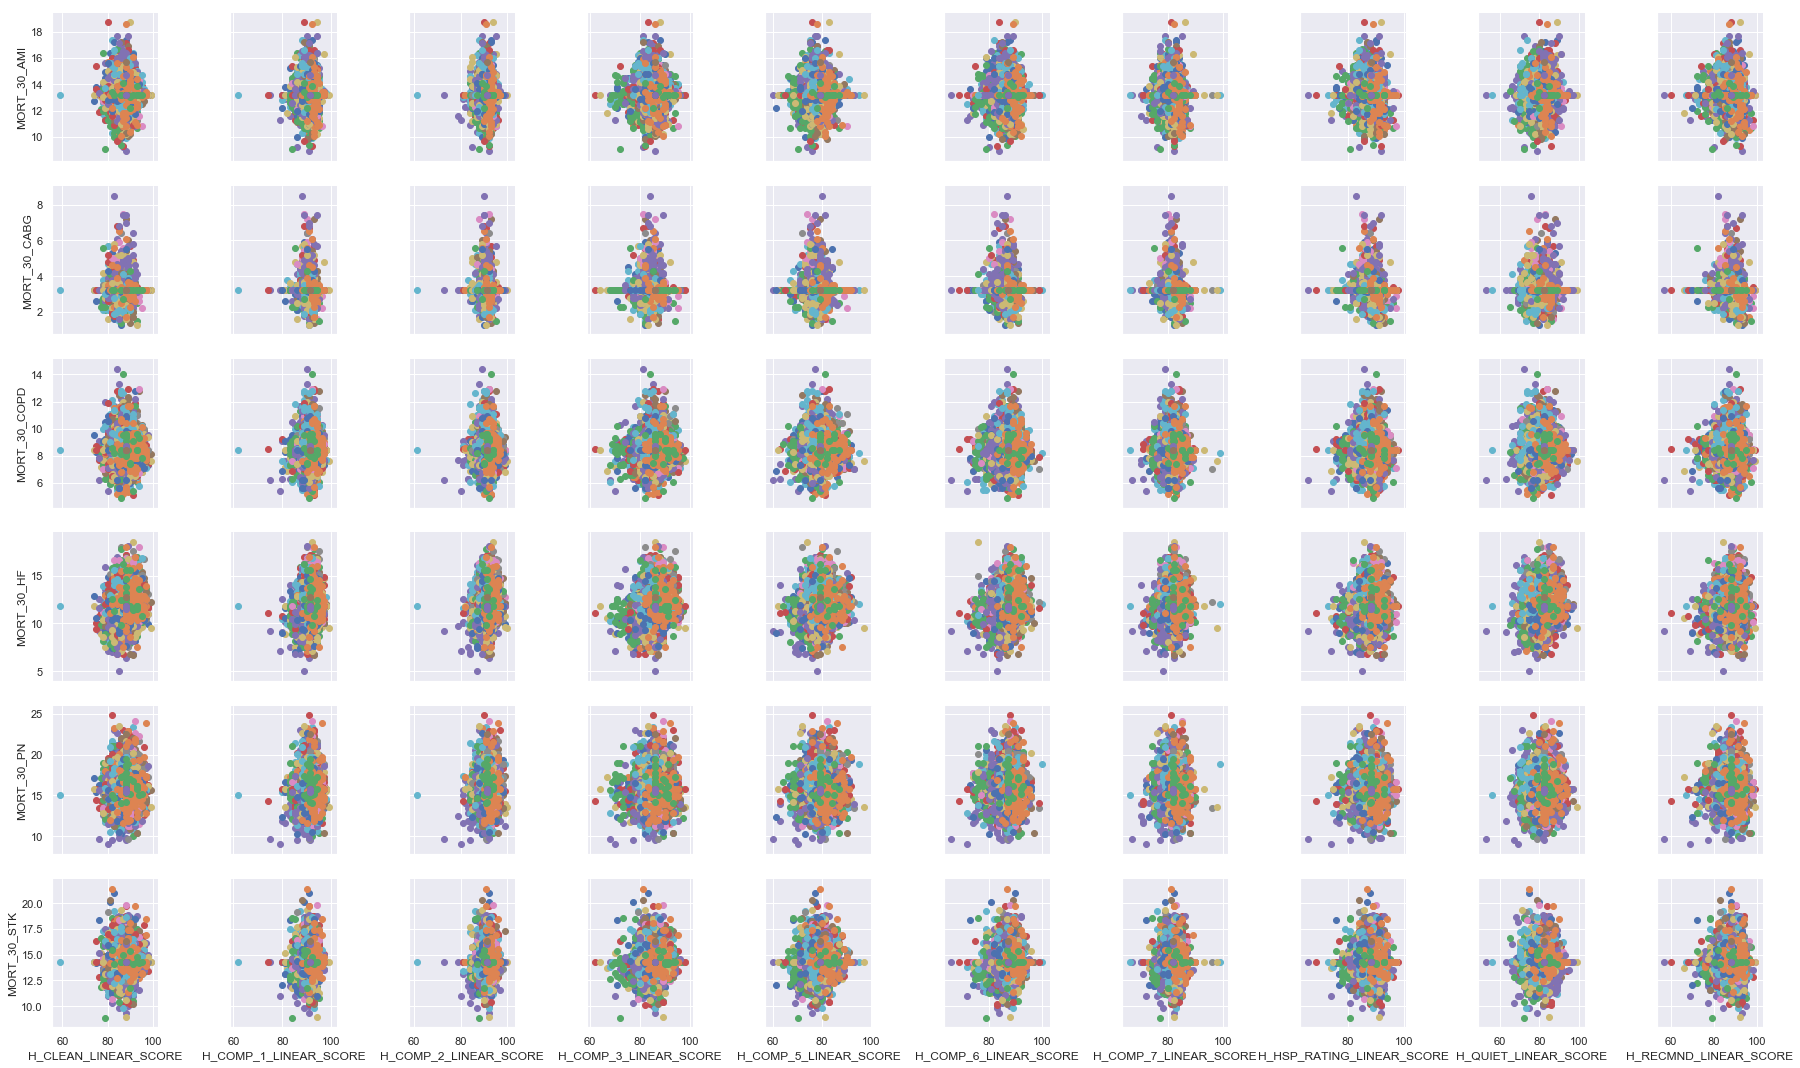

In [332]:
plt.figure(figsize=(15,18))
g = sns.PairGrid(datafill, 
                 x_vars = ['H_CLEAN_LINEAR_SCORE' , 'H_COMP_1_LINEAR_SCORE' , 'H_COMP_2_LINEAR_SCORE' , 
                           'H_COMP_3_LINEAR_SCORE' , 'H_COMP_5_LINEAR_SCORE' , 'H_COMP_6_LINEAR_SCORE' , 
                           'H_COMP_7_LINEAR_SCORE' , 'H_HSP_RATING_LINEAR_SCORE' , 'H_QUIET_LINEAR_SCORE' , 
                           'H_RECMND_LINEAR_SCORE'], 
                 y_vars= ['MORT_30_AMI' , 'MORT_30_CABG' , 'MORT_30_COPD' , 'MORT_30_HF' , 'MORT_30_PN' , 'MORT_30_STK'],
                 hue="State",palette=sns.color_palette() )
g = g.map(plt.scatter)
plt.savefig("PariGrid1.jpg")

<Figure size 1080x1296 with 0 Axes>

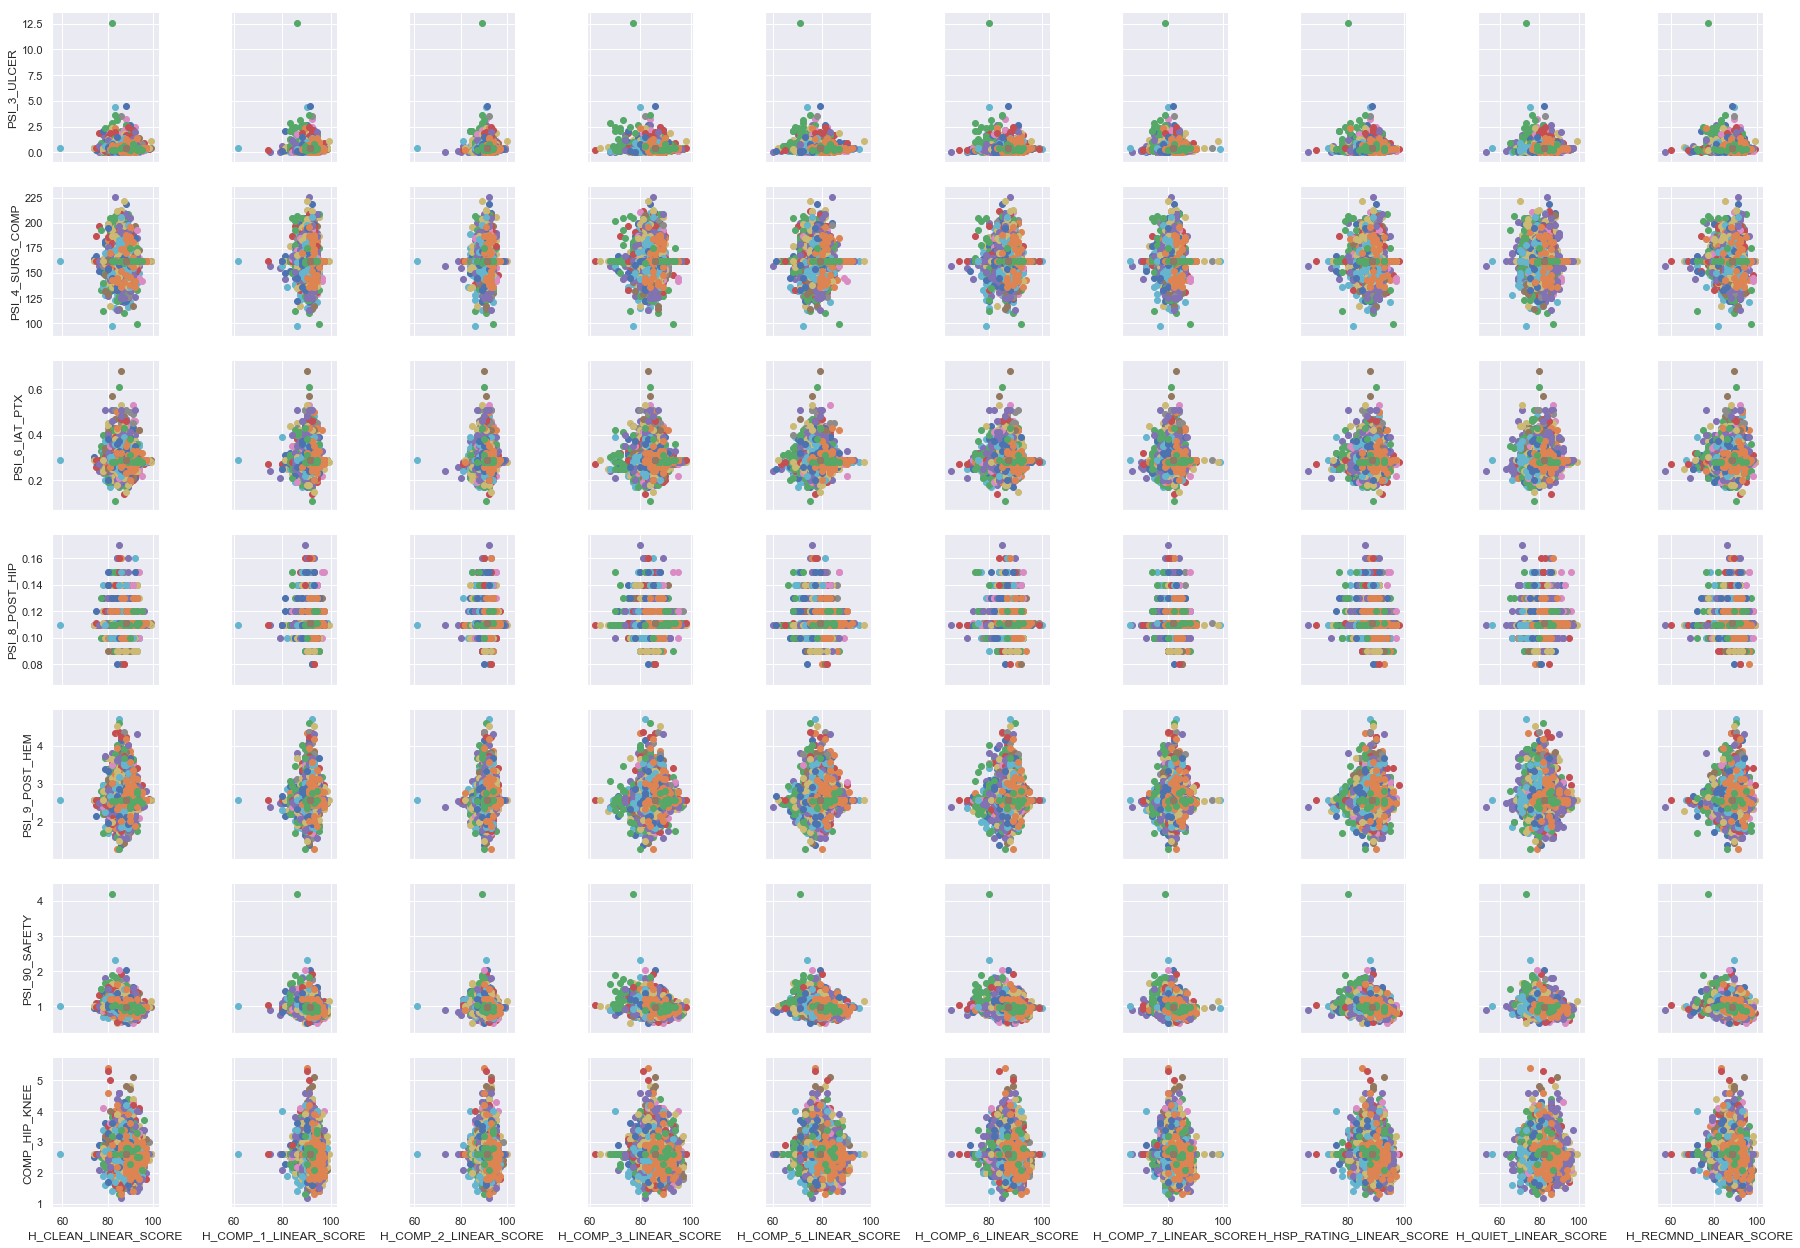

In [333]:
plt.figure(figsize=(15,18))
g = sns.PairGrid(datafill, 
                 x_vars = ['H_CLEAN_LINEAR_SCORE' , 'H_COMP_1_LINEAR_SCORE' , 'H_COMP_2_LINEAR_SCORE' , 
                           'H_COMP_3_LINEAR_SCORE' , 'H_COMP_5_LINEAR_SCORE' , 'H_COMP_6_LINEAR_SCORE' , 
                           'H_COMP_7_LINEAR_SCORE' , 'H_HSP_RATING_LINEAR_SCORE' , 'H_QUIET_LINEAR_SCORE' , 
                           'H_RECMND_LINEAR_SCORE'], 
                 y_vars= [
"PSI_3_ULCER",
"PSI_4_SURG_COMP",
"PSI_6_IAT_PTX",
"PSI_8_POST_HIP",
"PSI_9_POST_HEM",
"PSI_90_SAFETY",
"COMP_HIP_KNEE"],
                 hue="State", palette=sns.color_palette())
g = g.map(plt.scatter)

plt.savefig("PariGrid2.jpg")


<Figure size 1080x1296 with 0 Axes>

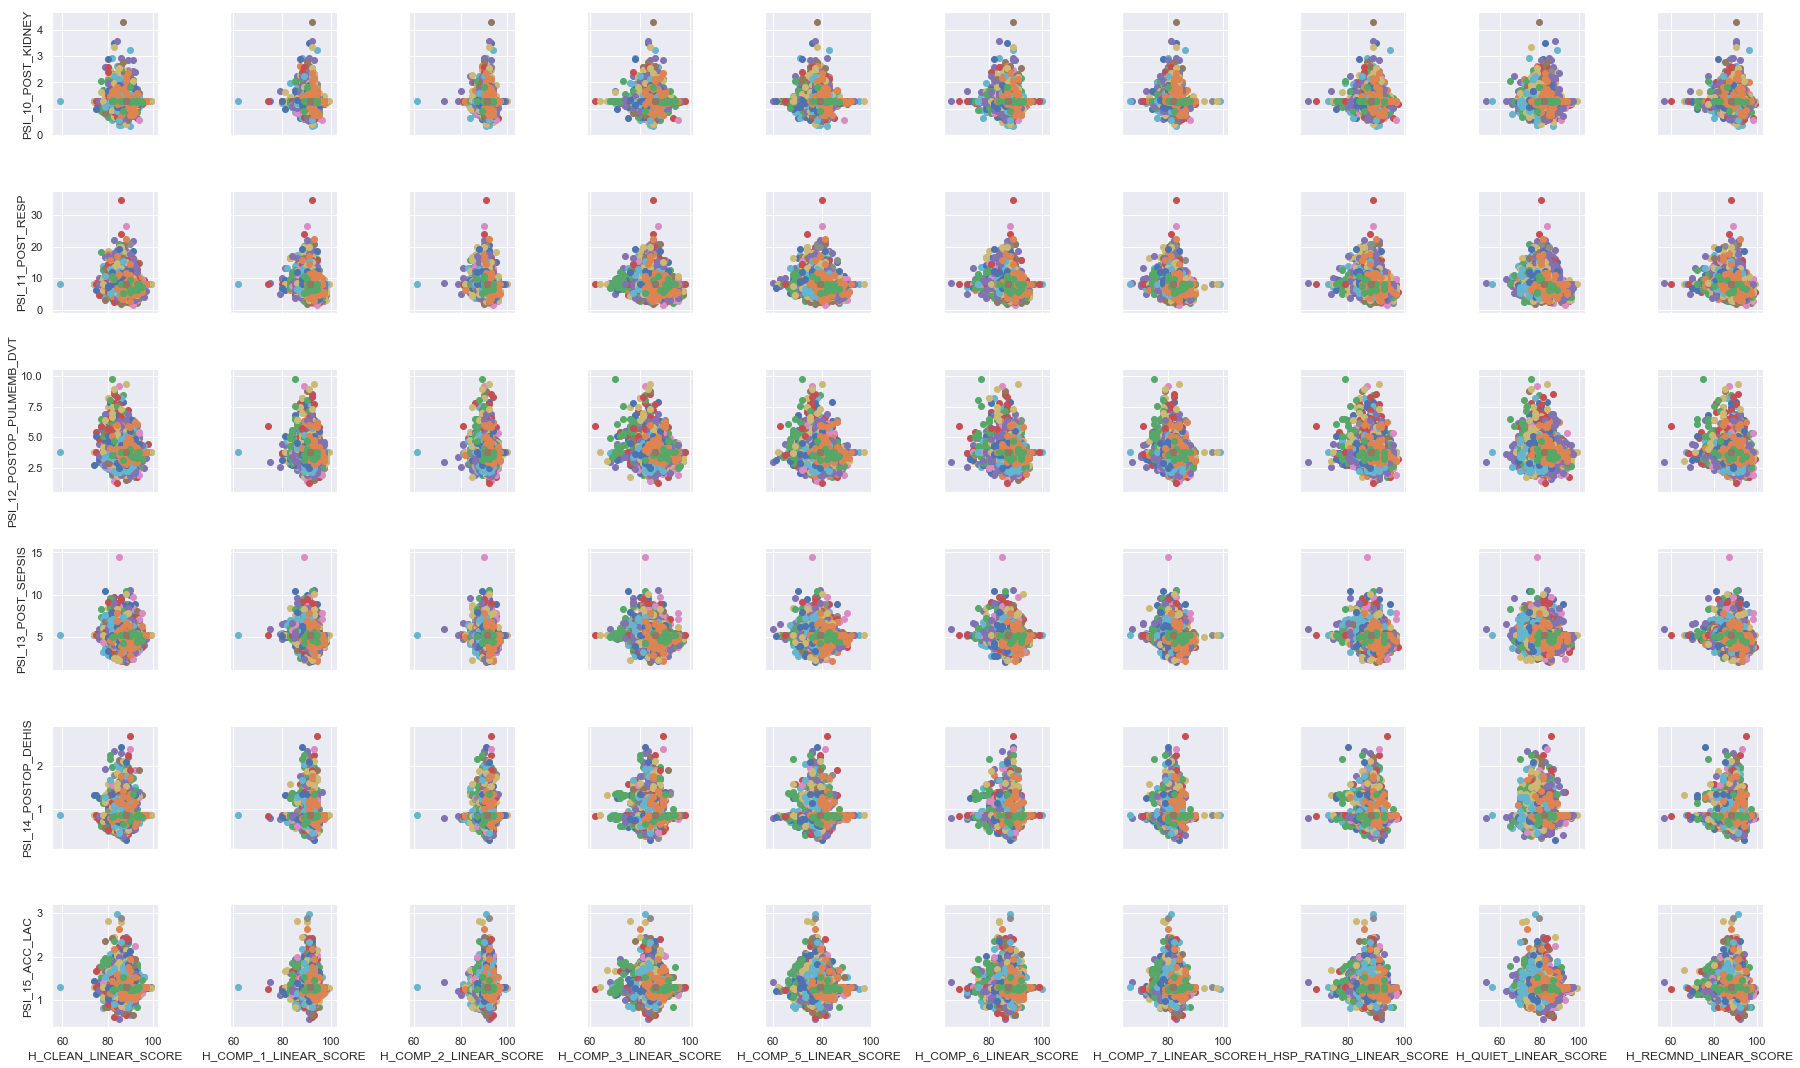

In [334]:
plt.figure(figsize=(15,18))
g = sns.PairGrid(datafill, 
                 x_vars = ['H_CLEAN_LINEAR_SCORE' , 'H_COMP_1_LINEAR_SCORE' , 'H_COMP_2_LINEAR_SCORE' , 
                           'H_COMP_3_LINEAR_SCORE' , 'H_COMP_5_LINEAR_SCORE' , 'H_COMP_6_LINEAR_SCORE' , 
                           'H_COMP_7_LINEAR_SCORE' , 'H_HSP_RATING_LINEAR_SCORE' , 'H_QUIET_LINEAR_SCORE' , 
                           'H_RECMND_LINEAR_SCORE'], 
                 y_vars= ["PSI_10_POST_KIDNEY",
"PSI_11_POST_RESP",
"PSI_12_POSTOP_PULMEMB_DVT",
"PSI_13_POST_SEPSIS",
"PSI_14_POSTOP_DEHIS",
"PSI_15_ACC_LAC"],
                 hue="State", palette=sns.color_palette())
g = g.map(plt.scatter)
plt.savefig("PariGrid3.jpg")

In [287]:

pd.set_option('display.max_columns', None)
datafill.describe()

,Unnamed: 0,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
count,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,2471.500000,2.596741,13.179386,3.230178,8.400422,11.773804,15.808070,14.289226,1.307723,8.037586,3.811502,5.212011,0.857961,1.289843,0.384768,161.794959,0.287304,0.110920,0.994331,2.588898,87.965146,91.375177,91.430434,85.736753,79.201190,87.199207,81.911873,88.447152,82.239445,88.086427,53858.319821,685.481552,26.372044
std,1427.354196,0.383712,0.851480,0.430685,0.941212,1.479533,1.826931,1.099641,0.231601,2.175556,0.709594,0.797482,0.186894,0.182006,0.338591,10.004094,0.037973,0.007518,0.140898,0.277518,3.236098,2.213072,2.129016,3.669054,3.610994,3.004783,2.323502,2.802141,4.346063,3.678971,26863.119996,806.878867,8.262556
min,0.000000,1.200000,8.900000,1.300000,4.900000,5.000000,9.000000,8.900000,0.330000,1.550000,1.210000,2.090000,0.270000,0.570000,0.020000,96.820000,0.110000,0.080000,0.520000,1.290000,59.000000,62.000000,61.000000,62.000000,60.000000,66.000000,66.000000,66.000000,53.000000,57.000000,603.000000,25.000000,3.000000
25%,1235.750000,2.500000,13.179386,3.230178,7.900000,11.000000,14.800000,14.100000,1.260000,7.190000,3.570000,4.990000,0.790000,1.230000,0.240000,161.794959,0.280000,0.110000,0.940000,2.510000,87.000000,91.000000,91.000000,84.000000,78.000000,86.000000,81.000000,87.000000,81.000000,87.000000,32951.250000,206.000000,21.000000
50%,2471.500000,2.596741,13.179386,3.230178,8.400422,11.773804,15.808070,14.289226,1.307723,8.037586,3.811502,5.212011,0.857961,1.289843,0.384768,161.794959,0.287304,0.110000,0.994331,2.588898,87.965146,91.375177,91.430434,85.736753,79.201190,87.199207,81.911873,88.447152,82.239445,88.086427,55037.000000,502.000000,26.372044
75%,3707.250000,2.600000,13.179386,3.230178,8.700000,12.400000,16.800000,14.300000,1.307723,8.037586,3.811502,5.212011,0.857961,1.289843,0.384768,161.794959,0.287304,0.110920,1.000000,2.588898,89.000000,92.000000,92.000000,87.000000,81.000000,89.000000,83.000000,90.000000,84.000000,90.000000,75987.250000,695.250000,30.000000
max,4943.000000,5.400000,18.700000,8.500000,14.400000,18.500000,24.800000,21.400000,4.310000,34.750000,9.820000,14.450000,2.700000,2.980000,12.600000,225.890000,0.680000,0.170000,4.210000,4.690000,99.000000,99.000000,100.000000,98.000000,97.000000,100.000000,99.000000,98.000000,99.000000,99.000000,99929.000000,11999.000000,82.000000


In [292]:
datafill[datafill['PSI_3_ULCER']>11]

,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
2990,2990,330196,2.596741,12.6,3.230178,9.0,8.7,17.7,13.5,1.307723,8.037586,6.23,5.212011,1.27,1.16,12.6,172.12,0.4,0.12,4.21,2.58,82.0,86.0,89.0,77.0,71.0,80.0,79.0,80.0,73.0,77.0,CONEY ISLAND HOSPITAL,2601 OCEAN PARKWAY,BROOKLYN,NY,11235.0,571.0,10.0


In [294]:
datafill[datafill['PSI_90_SAFETY']>3]


,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
2990,2990,330196,2.596741,12.6,3.230178,9.0,8.7,17.7,13.5,1.307723,8.037586,6.23,5.212011,1.27,1.16,12.6,172.12,0.4,0.12,4.21,2.58,82.0,86.0,89.0,77.0,71.0,80.0,79.0,80.0,73.0,77.0,CONEY ISLAND HOSPITAL,2601 OCEAN PARKWAY,BROOKLYN,NY,11235.0,571.0,10.0


In [295]:
datafill['PSI_90_SAFETY'].idxmax()

2990

In [298]:
comp1 = [
"PSI_3_ULCER",
"PSI_4_SURG_COMP",
"PSI_6_IAT_PTX",
"PSI_8_POST_HIP",
"PSI_9_POST_HEM",
"PSI_90_SAFETY",
"COMP_HIP_KNEE"]

comp2 = ["PSI_10_POST_KIDNEY",
"PSI_11_POST_RESP",
"PSI_12_POSTOP_PULMEMB_DVT",
"PSI_13_POST_SEPSIS",
"PSI_14_POSTOP_DEHIS",
"PSI_15_ACC_LAC"]
comp3 = ['MORT_30_AMI' , 'MORT_30_CABG' , 'MORT_30_COPD' , 'MORT_30_HF' , 'MORT_30_PN' , 'MORT_30_STK']
len(comp1 + comp2 + comp3)

19

In [322]:
ar = []
for i in sorted(comp1 + comp2 + comp3):
    ar.append(datafill[i].idxmax())
    print("Max value for the column {0:^25} is {1:^10} and min {2:^10}".format(i, datafill[i].max(), datafill[i].min()))

#     print(datafill.iloc[datafill[i].idxmax()])

Max value for the column       COMP_HIP_KNEE       is    5.4     and min    1.2    
Max value for the column        MORT_30_AMI        is    18.7    and min    8.9    
Max value for the column       MORT_30_CABG        is    8.5     and min    1.3    
Max value for the column       MORT_30_COPD        is    14.4    and min    4.9    
Max value for the column        MORT_30_HF         is    18.5    and min    5.0    
Max value for the column        MORT_30_PN         is    24.8    and min    9.0    
Max value for the column        MORT_30_STK        is    21.4    and min    8.9    
Max value for the column    PSI_10_POST_KIDNEY     is    4.31    and min    0.33   
Max value for the column     PSI_11_POST_RESP      is   34.75    and min    1.55   
Max value for the column PSI_12_POSTOP_PULMEMB_DVT is    9.82    and min    1.21   
Max value for the column    PSI_13_POST_SEPSIS     is   14.45    and min    2.09   
Max value for the column    PSI_14_POSTOP_DEHIS    is    2.7     and min    

In [335]:
lin_scores = ['H_CLEAN_LINEAR_SCORE' , 'H_COMP_1_LINEAR_SCORE' , 'H_COMP_2_LINEAR_SCORE' , 
                           'H_COMP_3_LINEAR_SCORE' , 'H_COMP_5_LINEAR_SCORE' , 'H_COMP_6_LINEAR_SCORE' , 
                           'H_COMP_7_LINEAR_SCORE' , 'H_HSP_RATING_LINEAR_SCORE' , 'H_QUIET_LINEAR_SCORE' , 
                           'H_RECMND_LINEAR_SCORE']

arr = []
for i in sorted(lin_scores):
    arr.append(datafill[i].idxmax())
    print("Max value for the column {0:^25} is {1:^10} and min {2:^10}".format(i, datafill[i].max(), datafill[i].min()))

#     print(datafill.iloc[datafill[i].idxmax()])

Max value for the column   H_CLEAN_LINEAR_SCORE    is    99.0    and min    59.0   
Max value for the column   H_COMP_1_LINEAR_SCORE   is    99.0    and min    62.0   
Max value for the column   H_COMP_2_LINEAR_SCORE   is   100.0    and min    61.0   
Max value for the column   H_COMP_3_LINEAR_SCORE   is    98.0    and min    62.0   
Max value for the column   H_COMP_5_LINEAR_SCORE   is    97.0    and min    60.0   
Max value for the column   H_COMP_6_LINEAR_SCORE   is   100.0    and min    66.0   
Max value for the column   H_COMP_7_LINEAR_SCORE   is    99.0    and min    66.0   
Max value for the column H_HSP_RATING_LINEAR_SCORE is    98.0    and min    66.0   
Max value for the column   H_QUIET_LINEAR_SCORE    is    99.0    and min    53.0   
Max value for the column   H_RECMND_LINEAR_SCORE   is    99.0    and min    57.0   


In [344]:
col = pd.DataFrame(sorted(lin_scores) + sorted(comp1 + comp2 + comp3), columns=['fields'])
col


,fields
0,H_CLEAN_LINEAR_SCORE
1,H_COMP_1_LINEAR_SCORE
2,H_COMP_2_LINEAR_SCORE
3,H_COMP_3_LINEAR_SCORE
4,H_COMP_5_LINEAR_SCORE
5,H_COMP_6_LINEAR_SCORE
6,H_COMP_7_LINEAR_SCORE
7,H_HSP_RATING_LINEAR_SCORE
8,H_QUIET_LINEAR_SCORE
9,H_RECMND_LINEAR_SCORE


In [361]:
filters = survey.groupby(['HCAHPS Measure ID','HCAHPS Question']).size().reset_index()

In [363]:
filters[filters['HCAHPS Measure ID'].isin(col.values)]

ValueError: Buffer has wrong number of dimensions (expected 1, got 2)

In [305]:
datafill.iloc[ar]

,Unnamed: 0,Provider ID,COMP_HIP_KNEE,MORT_30_AMI,MORT_30_CABG,MORT_30_COPD,MORT_30_HF,MORT_30_PN,MORT_30_STK,PSI_10_POST_KIDNEY,PSI_11_POST_RESP,PSI_12_POSTOP_PULMEMB_DVT,PSI_13_POST_SEPSIS,PSI_14_POSTOP_DEHIS,PSI_15_ACC_LAC,PSI_3_ULCER,PSI_4_SURG_COMP,PSI_6_IAT_PTX,PSI_8_POST_HIP,PSI_90_SAFETY,PSI_9_POST_HEM,H_CLEAN_LINEAR_SCORE,H_COMP_1_LINEAR_SCORE,H_COMP_2_LINEAR_SCORE,H_COMP_3_LINEAR_SCORE,H_COMP_5_LINEAR_SCORE,H_COMP_6_LINEAR_SCORE,H_COMP_7_LINEAR_SCORE,H_HSP_RATING_LINEAR_SCORE,H_QUIET_LINEAR_SCORE,H_RECMND_LINEAR_SCORE,Hospital Name,Address,City,State,ZIP Code,Number of Completed Surveys,Survey Response Rate Percent
2990,2990,330196,2.596741,12.600000,3.230178,9.0,8.7,17.7,13.500000,1.307723,8.037586,6.230000,5.212011,1.270000,1.160000,12.600000,172.120000,0.400000,0.12000,4.210000,2.580000,82.0,86.0,89.0,77.0,71.0,80.0,79.0,80.0,73.0,77.0,CONEY ISLAND HOSPITAL,2601 OCEAN PARKWAY,BROOKLYN,NY,11235.0,571.0,10.0
2406,2406,250104,1.700000,14.200000,4.500000,9.2,12.4,16.7,14.900000,1.340000,17.990000,3.610000,4.510000,1.120000,1.340000,0.310000,225.890000,0.240000,0.11000,1.230000,3.160000,83.0,91.0,92.0,85.0,84.0,88.0,81.0,89.0,84.0,91.0,ANDERSON REGIONAL MEDICAL CTR,2124 14 ST,MERIDIAN,MS,39301.0,632.0,25.0
1493,1493,160083,2.800000,12.300000,2.800000,9.1,13.5,16.2,14.200000,1.160000,16.340000,3.960000,6.770000,0.770000,2.090000,0.750000,184.640000,0.680000,0.13000,1.480000,2.170000,86.0,90.0,90.0,83.0,79.0,88.0,83.0,88.0,80.0,89.0,MERCY MEDICAL CENTER-DES MOINES,1111 6TH AVE,DES MOINES,IA,50314.0,1495.0,26.0
356,356,050152,2.100000,13.179386,3.230178,9.4,10.0,15.0,13.100000,1.260000,6.350000,2.680000,5.720000,0.810000,1.450000,0.140000,151.670000,0.260000,0.17000,0.860000,2.390000,85.0,89.0,92.0,80.0,76.0,85.0,80.0,86.0,71.0,86.0,SAINT FRANCIS MEMORIAL HOSPITAL,900 HYDE ST,SAN FRANCISCO,CA,94109.0,455.0,18.0
2777,2777,300034,2.000000,12.100000,1.500000,7.0,8.6,15.7,13.400000,1.490000,7.200000,2.580000,7.290000,1.930000,1.100000,0.940000,172.600000,0.180000,0.14000,1.190000,4.690000,85.0,92.0,92.0,82.0,77.0,88.0,83.0,88.0,73.0,90.0,CATHOLIC MEDICAL CENTER,100 MCGREGOR STREET,MANCHESTER,NH,3102.0,1239.0,29.0
2990,2990,330196,2.596741,12.600000,3.230178,9.0,8.7,17.7,13.500000,1.307723,8.037586,6.230000,5.212011,1.270000,1.160000,12.600000,172.120000,0.400000,0.12000,4.210000,2.580000,82.0,86.0,89.0,77.0,71.0,80.0,79.0,80.0,73.0,77.0,CONEY ISLAND HOSPITAL,2601 OCEAN PARKWAY,BROOKLYN,NY,11235.0,571.0,10.0
2859,2859,320002,5.400000,12.300000,3.230178,8.7,12.4,15.1,16.100000,1.110000,4.870000,3.710000,5.480000,0.680000,1.220000,0.410000,167.710000,0.270000,0.12000,0.900000,2.460000,80.0,90.0,90.0,83.0,77.0,86.0,80.0,85.0,75.0,83.0,CHRISTUS ST VINCENT REGIONAL MEDICAL CENTER,455 ST MICHAEL'S DRIVE,SANTA FE,NM,87505.0,494.0,20.0
2505,2505,260110,2.300000,12.900000,3.600000,8.6,14.9,17.2,11.800000,4.310000,6.720000,3.800000,8.850000,0.630000,1.570000,0.330000,183.800000,0.290000,0.10000,1.300000,2.470000,87.0,92.0,93.0,85.0,78.0,89.0,83.0,89.0,80.0,90.0,SOUTHEASTHEALTH,1701 LACEY ST,CAPE GIRARDEAU,MO,63701.0,1190.0,25.0
2276,2276,240210,2.800000,12.200000,3.230178,9.3,10.1,15.4,12.800000,1.900000,34.750000,3.760000,6.000000,0.710000,1.680000,0.620000,149.340000,0.260000,0.11000,1.920000,3.390000,86.0,92.0,91.0,85.0,80.0,89.0,83.0,89.0,81.0,88.0,HEALTHEAST ST JOHN'S HOSPITAL,1575 BEAM AVENUE,MAPLEWOOD,MN,55109.0,869.0,24.0
3015,3015,330233,2.596741,14.700000,3.230178,9.3,11.9,17.0,13.200000,1.280000,9.810000,9.820000,5.470000,0.810000,1.160000,2.500000,201.670000,0.420000,0.12000,1.900000,2.320000,82.0,85.0,89.0,70.0,72.0,77.0,75.0,79.0,76.0,75.0,BROOKDALE HOSPITAL MEDICAL CENTER,1 BROOKDALE PLAZA,BROOKLYN,NY,11212.0,773.0,9.0
